In [1]:
import pandas as pd
import sys
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tqdm import tqdm
from sklearn import linear_model
reg = linear_model.LinearRegression()

import warnings
warnings.filterwarnings("ignore")

In [2]:
#불러오기
merge = pd.read_csv('C:/Users/twentystones/Desktop/빅콘/02_평가데이터_update(210806)/merge2.csv', encoding='cp949', index_col=0)
merge = merge.drop(merge.index[[0,1,2,3]])
merge

#스케일링
min_max_scaler = MinMaxScaler()
fitted = min_max_scaler.fit(merge)
print(fitted.data_max_)
merge_scale = min_max_scaler.transform(merge)
merge_scale = pd.DataFrame(merge_scale, columns=merge.columns, index=merge.index)

#결측치는 스케일링했으니 중간값으로
merge_scale = merge_scale.fillna(0.5)

merge_scale

[1.13990000e+05 1.03571000e+05 1.17835000e+05 ... 4.09810384e+09
 4.34464795e+09 3.71456376e+09]


,em_cnt18_01,em_cnt18_02,em_cnt18_03,em_cnt18_04,em_cnt18_05,em_cnt18_06,em_cnt18_07,em_cnt18_08,em_cnt18_09,em_cnt18_10,...,use_amt한식20_09,use_amt한식20_10,use_amt한식20_11,use_amt한식20_12,use_amt한식21_01,use_amt한식21_02,use_amt한식21_03,use_amt한식21_04,use_amt한식21_05,use_amt한식21_06
건입동,0.153336,0.161185,0.156232,0.155084,0.153612,0.157284,0.161597,0.156547,0.167844,0.162392,...,0.149582,0.145866,0.141089,0.141678,0.140700,0.150853,0.149342,0.138585,0.138585,0.141816
구좌읍,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,...,0.120619,0.115228,0.110187,0.119660,0.126173,0.115806,0.124857,0.123291,0.119032,0.129150
남원읍,0.074971,0.074429,0.076312,0.075451,0.074637,0.072644,0.070224,0.073072,0.075761,0.076545,...,0.123961,0.137478,0.173337,0.181273,0.167788,0.164948,0.142298,0.158509,0.118394,0.137086
노형동,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
대륜동,0.182127,0.178346,0.174841,0.174562,0.162232,0.153066,0.150414,0.152757,0.156404,0.157836,...,0.152896,0.153580,0.161596,0.170319,0.178718,0.178068,0.189337,0.173082,0.161090,0.187133
대정읍,0.080420,0.083609,0.085012,0.086817,0.087563,0.083383,0.072571,0.087512,0.096153,0.093850,...,0.199740,0.212699,0.199422,0.239758,0.239646,0.233175,0.247775,0.240922,0.258636,0.271240
대천동,0.169848,0.161497,0.160038,0.152333,0.150305,0.147363,0.139731,0.145038,0.151634,0.154366,...,0.151983,0.163403,0.160180,0.181984,0.178903,0.154845,0.161913,0.162870,0.146210,0.161760
도두동,0.037481,0.038881,0.038392,0.037023,0.036414,0.036289,0.036842,0.035525,0.041036,0.040532,...,0.032888,0.027269,0.031546,0.047804,0.030841,0.039890,0.041228,0.037409,0.037102,0.035497
동홍동,0.397128,0.412099,0.388245,0.359241,0.344871,0.347742,0.340212,0.335165,0.342125,0.339886,...,0.255438,0.269588,0.264077,0.296462,0.293288,0.274407,0.269870,0.259872,0.250851,0.276253
봉개동,0.023050,0.024956,0.022989,0.023244,0.024510,0.024717,0.025775,0.024786,0.030353,0.029586,...,0.045530,0.046525,0.051132,0.051402,0.052849,0.048293,0.056354,0.061312,0.058704,0.061154


In [3]:
#삭제할 칼럼 있으면 선택

delete=[]
for i in merge_scale.columns.tolist():
    if not (i[:7] == 'pay_amt') | (i[:6] == 'em_cnt'):
        delete.append(i)
merge_scale=merge_scale[delete]
merge_scale

,em_g18_01,em_g18_02,em_g18_03,em_g18_04,em_g18_05,em_g18_06,em_g18_07,em_g18_08,em_g18_09,em_g18_10,...,use_amt한식20_09,use_amt한식20_10,use_amt한식20_11,use_amt한식20_12,use_amt한식21_01,use_amt한식21_02,use_amt한식21_03,use_amt한식21_04,use_amt한식21_05,use_amt한식21_06
건입동,0.147323,0.152582,0.146641,0.143824,0.147463,0.150992,0.150145,0.149450,0.172463,0.165617,...,0.149582,0.145866,0.141089,0.141678,0.140700,0.150853,0.149342,0.138585,0.138585,0.141816
구좌읍,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,0.500000,...,0.120619,0.115228,0.110187,0.119660,0.126173,0.115806,0.124857,0.123291,0.119032,0.129150
남원읍,0.134850,0.127828,0.133453,0.144922,0.138408,0.128629,0.125847,0.139451,0.154806,0.161493,...,0.123961,0.137478,0.173337,0.181273,0.167788,0.164948,0.142298,0.158509,0.118394,0.137086
노형동,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
대륜동,0.193834,0.189589,0.188089,0.198440,0.182436,0.168953,0.169508,0.176616,0.176318,0.178481,...,0.152896,0.153580,0.161596,0.170319,0.178718,0.178068,0.189337,0.173082,0.161090,0.187133
대정읍,0.121043,0.126322,0.137112,0.139645,0.141491,0.135886,0.127385,0.153628,0.176463,0.175216,...,0.199740,0.212699,0.199422,0.239758,0.239646,0.233175,0.247775,0.240922,0.258636,0.271240
대천동,0.179242,0.161037,0.160352,0.145037,0.143234,0.139208,0.136305,0.148325,0.155821,0.160228,...,0.151983,0.163403,0.160180,0.181984,0.178903,0.154845,0.161913,0.162870,0.146210,0.161760
도두동,0.027014,0.030407,0.029055,0.029640,0.030456,0.031583,0.030816,0.033843,0.041659,0.045085,...,0.032888,0.027269,0.031546,0.047804,0.030841,0.039890,0.041228,0.037409,0.037102,0.035497
동홍동,0.431278,0.451633,0.420423,0.383431,0.370171,0.364932,0.365230,0.363854,0.372093,0.378500,...,0.255438,0.269588,0.264077,0.296462,0.293288,0.274407,0.269870,0.259872,0.250851,0.276253
봉개동,0.010286,0.013470,0.008980,0.011323,0.014694,0.012782,0.015970,0.021839,0.027329,0.025655,...,0.045530,0.046525,0.051132,0.051402,0.052849,0.048293,0.056354,0.061312,0.058704,0.061154


# 전체선택법 함수로 만들기

In [4]:
#전진선택법 함수
def forward_select(drop_col, data):
    variables = data.drop(drop_col, axis=1).columns.tolist() ## 설명 변수 리스트

    y = data[drop_col] ## 반응 변수
    global selected_variables
    selected_variables = [] ## 선택된 변수들
    sl_enter = 0.05

    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    while len(variables) > 0:
        remainder = list(set(variables) - set(selected_variables))
        pval = pd.Series(index=remainder) ## 변수의 p-value
        ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
        ## 선형 모형을 적합한다.
        for col in remainder: 
            X = data[selected_variables+[col]]
            X = sm.add_constant(X)
            model = sm.OLS(y,X).fit()
            pval[col] = model.pvalues[col]

        min_pval = pval.min()
        if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
            selected_variables.append(pval.idxmin())

            step += 1
            steps.append(step)
            adj_r_squared = sm.OLS(y,sm.add_constant(data[selected_variables])).fit().rsquared_adj
            adjusted_r_squared.append(adj_r_squared)
            sv_per_step.append(selected_variables.copy())
        else:
            break
            
    fig = plt.figure(figsize=(10,10))
    fig.set_facecolor('white')

    font_size = 15
    plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=3)
    plt.plot(steps,adjusted_r_squared, marker='o')

    plt.ylabel('Adjusted R Squared',fontsize=font_size)
    plt.grid(True)
    plt.show()

    return selected_variables


#후진소거법 함수
def backward_select(drop_col, data):
    variables = data.drop(drop_col, axis=1).columns.tolist() ## 설명 변수 리스트

    y = data[drop_col] ## 반응 변수
    global selected_variables
    selected_variables = variables ## 초기에는 모든 변수가 선택된 상태
    sl_remove = 0.05

    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    while len(selected_variables) > 0:
        X = sm.add_constant(data[selected_variables])
        p_vals = sm.OLS(y,X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
        max_pval = p_vals.max() ## 최대 p-value
        if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
            remove_variable = p_vals.idxmax()
            selected_variables.remove(remove_variable)

            step += 1
            steps.append(step)
            adj_r_squared = sm.OLS(y,sm.add_constant(data[selected_variables])).fit().rsquared_adj
            adjusted_r_squared.append(adj_r_squared)
            sv_per_step.append(selected_variables.copy())
        else:
            break

    fig = plt.figure(figsize=(10,10))
    fig.set_facecolor('white')

    font_size = 15
    plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=3)
    plt.plot(steps,adjusted_r_squared, marker='o')

    plt.ylabel('Adjusted R Squared',fontsize=font_size)
    plt.grid(True)
    plt.show()

    return selected_variables



#단계별선택법 함수
def stepwise_select(drop_col, data):
    
    variables = data.drop(drop_col, axis=1).columns.tolist() ## 설명 변수 리스트

    y = data[drop_col] ## 반응 변수
    global selected_variables
    selected_variables = [] ## 선택된 변수들
    sl_enter = 0.05
    sl_remove = 0.05

    sv_per_step = [] ## 각 스텝별로 선택된 변수들
    adjusted_r_squared = [] ## 각 스텝별 수정된 결정계수
    steps = [] ## 스텝
    step = 0
    while len(variables) > 0:
        remainder = list(set(variables) - set(selected_variables))
        pval = pd.Series(index=remainder) ## 변수의 p-value
        ## 기존에 포함된 변수와 새로운 변수 하나씩 돌아가면서 
        ## 선형 모형을 적합한다.
        for col in remainder: 
            X = data[selected_variables+[col]]
            X = sm.add_constant(X)
            model = sm.OLS(y,X).fit()
            pval[col] = model.pvalues[col]

        min_pval = pval.min()
        if min_pval < sl_enter: ## 최소 p-value 값이 기준 값보다 작으면 포함
            selected_variables.append(pval.idxmin())
            ## 선택된 변수들에대해서
            ## 어떤 변수를 제거할지 고른다.
            while len(selected_variables) > 0:
                selected_X = data[selected_variables]
                selected_X = sm.add_constant(selected_X)
                selected_pval = sm.OLS(y,selected_X).fit().pvalues[1:] ## 절편항의 p-value는 뺀다
                max_pval = selected_pval.max()
                if max_pval >= sl_remove: ## 최대 p-value값이 기준값보다 크거나 같으면 제외
                    remove_variable = selected_pval.idxmax()
                    selected_variables.remove(remove_variable)
                else:
                    break

            step += 1
            steps.append(step)
            adj_r_squared = sm.OLS(y,sm.add_constant(data[selected_variables])).fit().rsquared_adj
            adjusted_r_squared.append(adj_r_squared)
            sv_per_step.append(selected_variables.copy())
        else:
            break

    fig = plt.figure(figsize=(10,10))
    fig.set_facecolor('white')

    font_size = 15
    plt.xticks(steps,[f'step {s}\n'+'\n'.join(sv_per_step[i]) for i,s in enumerate(steps)], fontsize=3)
    plt.plot(steps,adjusted_r_squared, marker='o')

    plt.ylabel('Adjusted R Squared',fontsize=font_size)
    plt.grid(True)
    plt.show()
    
    

    return selected_variables


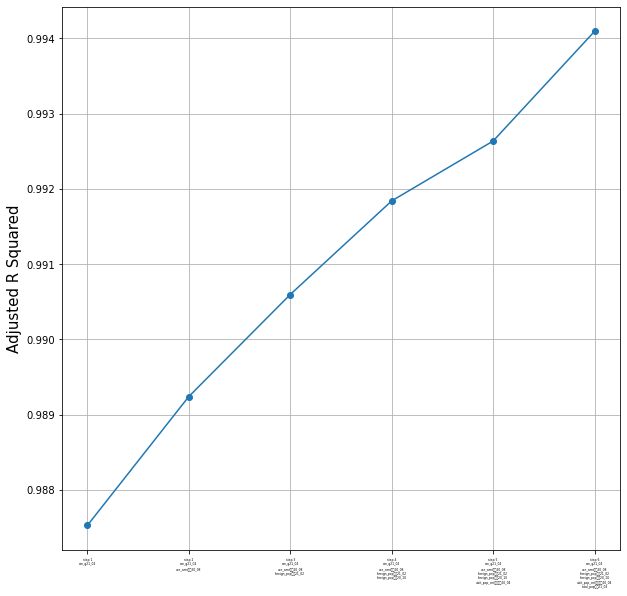

['em_g21_04',
 'use_amt부페20_08',
 'foreign_pop남성21_02',
 'foreign_pop남성20_10',
 'visit_pop_cnt단기해외20_04',
 'total_pop남성21_03']

In [5]:
forward_select('em_g21_06', merge_scale)

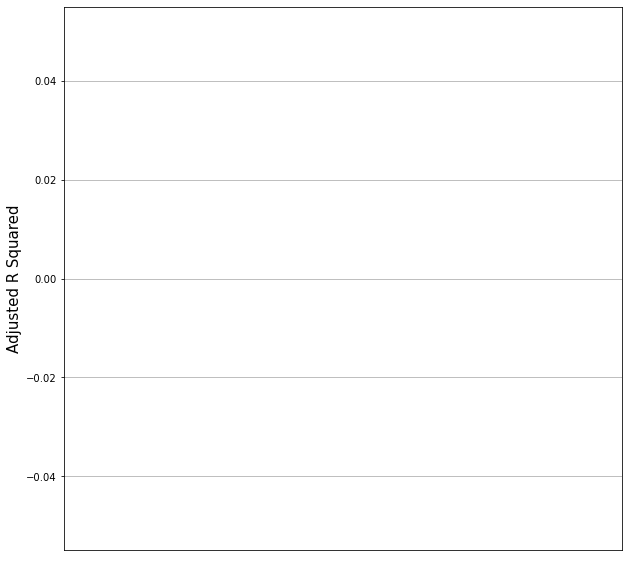

['em_g18_01',
 'em_g18_02',
 'em_g18_03',
 'em_g18_04',
 'em_g18_05',
 'em_g18_06',
 'em_g18_07',
 'em_g18_08',
 'em_g18_09',
 'em_g18_10',
 'em_g18_11',
 'em_g18_12',
 'em_g19_01',
 'em_g19_02',
 'em_g19_03',
 'em_g19_04',
 'em_g19_05',
 'em_g19_06',
 'em_g19_07',
 'em_g19_08',
 'em_g19_09',
 'em_g19_10',
 'em_g19_11',
 'em_g19_12',
 'em_g20_01',
 'em_g20_02',
 'em_g20_03',
 'em_g20_04',
 'em_g20_05',
 'em_g20_06',
 'em_g20_07',
 'em_g20_08',
 'em_g20_09',
 'em_g20_10',
 'em_g20_11',
 'em_g20_12',
 'em_g21_01',
 'em_g21_02',
 'em_g21_03',
 'em_g21_04',
 'em_g21_05',
 'resd_pop_cnt내국인남성제주18_01',
 'resd_pop_cnt내국인남성제주18_02',
 'resd_pop_cnt내국인남성제주18_03',
 'resd_pop_cnt내국인남성제주18_04',
 'resd_pop_cnt내국인남성제주18_05',
 'resd_pop_cnt내국인남성제주18_06',
 'resd_pop_cnt내국인남성제주18_07',
 'resd_pop_cnt내국인남성제주18_08',
 'resd_pop_cnt내국인남성제주18_09',
 'resd_pop_cnt내국인남성제주18_10',
 'resd_pop_cnt내국인남성제주18_11',
 'resd_pop_cnt내국인남성제주18_12',
 'resd_pop_cnt내국인남성제주19_01',
 'resd_pop_cnt내국인남성제주19_02',
 'resd_pop_cnt내국인남성제

In [6]:
backward_select('em_g21_06', merge_scale)

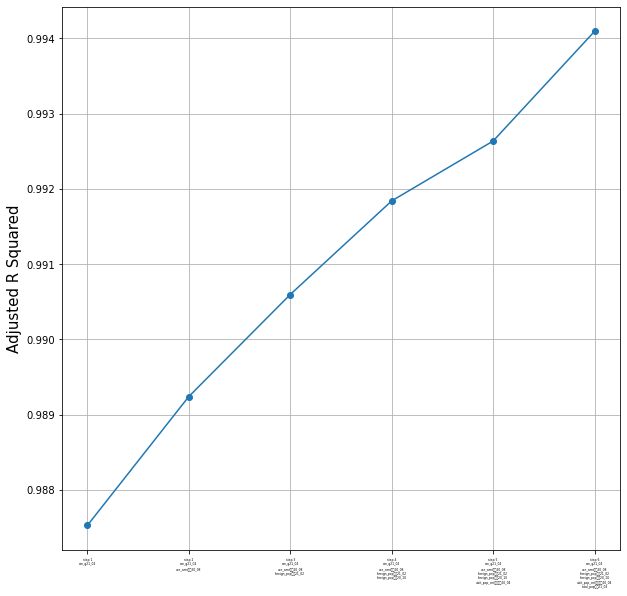

['em_g21_04',
 'use_amt부페20_08',
 'foreign_pop남성21_02',
 'foreign_pop남성20_10',
 'visit_pop_cnt단기해외20_04',
 'total_pop남성21_03']

In [7]:
stepwise_select('em_g21_06', merge_scale)

# 1. 월단위

In [8]:
#그냥 월단위로 정렬
selected_list=[]
month=[]
for j in ['01','02','03','04','05','06','07','08','09','10','11','12']:
    for i in merge_scale.columns.tolist():
        if i[-2:] == j:
            month.append(i)
merge_scale[month]

,em_g18_01,em_g19_01,em_g20_01,em_g21_01,resd_pop_cnt내국인남성제주18_01,resd_pop_cnt내국인남성제주19_01,resd_pop_cnt내국인남성제주20_01,resd_pop_cnt내국인남성제주21_01,resd_pop_cnt내국인여성제주18_01,resd_pop_cnt내국인여성제주19_01,...,use_amt양식20_12,use_amt주점및주류판매18_12,use_amt주점및주류판매19_12,use_amt주점및주류판매20_12,use_amt패스트푸드18_12,use_amt패스트푸드19_12,use_amt패스트푸드20_12,use_amt한식18_12,use_amt한식19_12,use_amt한식20_12
건입동,0.147323,0.162565,0.191285,0.141328,0.123476,0.115938,0.109364,0.125933,0.115505,0.115452,...,0.137569,0.092189,0.099123,0.095914,0.125600,0.116861,0.129783,0.143682,0.133469,0.141678
구좌읍,0.500000,0.500000,0.087337,0.094080,0.226935,0.239967,0.252184,0.252706,0.180462,0.198131,...,0.096449,0.032672,0.064685,0.029832,0.092099,0.121361,0.136596,0.091175,0.098717,0.119660
남원읍,0.134850,0.157479,0.291444,0.222251,0.246782,0.269192,0.273803,0.293591,0.196151,0.201950,...,0.135966,0.065802,0.084074,0.037244,0.109814,0.137821,0.183627,0.126684,0.125156,0.181273
노형동,1.000000,1.000000,1.000000,1.000000,0.961717,1.000000,1.000000,1.000000,0.983277,0.989210,...,1.000000,1.000000,0.870950,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
대륜동,0.193834,0.184883,0.243061,0.171857,0.203571,0.241350,0.241211,0.266390,0.216175,0.238318,...,0.207560,0.086927,0.077551,0.135685,0.168951,0.191392,0.206961,0.151479,0.152220,0.170319
대정읍,0.121043,0.214824,0.442923,0.420794,0.322622,0.333483,0.357601,0.352864,0.269350,0.266870,...,0.765873,0.074502,0.049715,0.098665,0.273861,0.325969,0.430522,0.182440,0.189624,0.239758
대천동,0.179242,0.156858,0.247176,0.244358,0.117120,0.107503,0.123495,0.139873,0.096424,0.096403,...,0.231412,0.065896,0.064202,0.092713,0.191441,0.217523,0.223307,0.150043,0.159425,0.181984
도두동,0.027014,0.040205,0.077660,0.064214,0.008654,0.010150,0.011503,0.007951,0.007837,0.009453,...,0.021871,0.033076,0.038493,0.018600,0.029950,0.048610,0.038044,0.039082,0.037302,0.047804
동홍동,0.431278,0.307811,0.563209,0.428894,0.302253,0.322128,0.338693,0.336053,0.298654,0.321188,...,0.298836,0.145801,0.194998,0.123279,0.338382,0.341615,0.360300,0.287263,0.266128,0.296462
봉개동,0.010286,0.042194,0.068094,0.053480,0.051658,0.060123,0.070954,0.070861,0.043345,0.054549,...,0.045914,0.027296,0.037412,0.022994,0.020013,0.044532,0.055631,0.032208,0.043919,0.051402


01


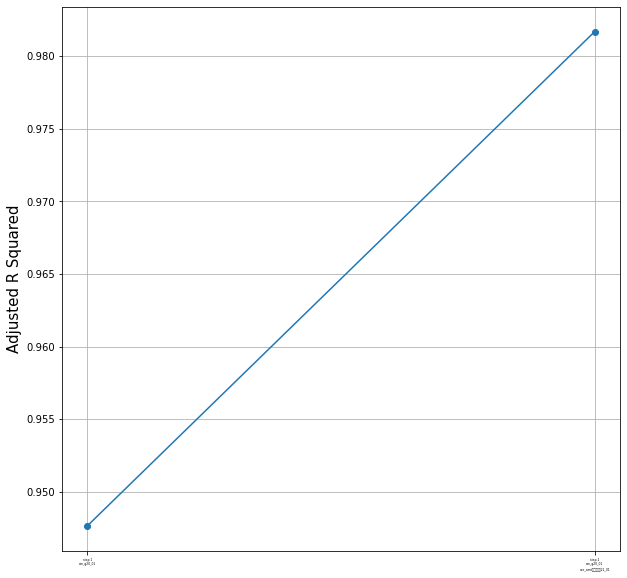

['em_g20_01', 'use_amt아시아음식21_01']


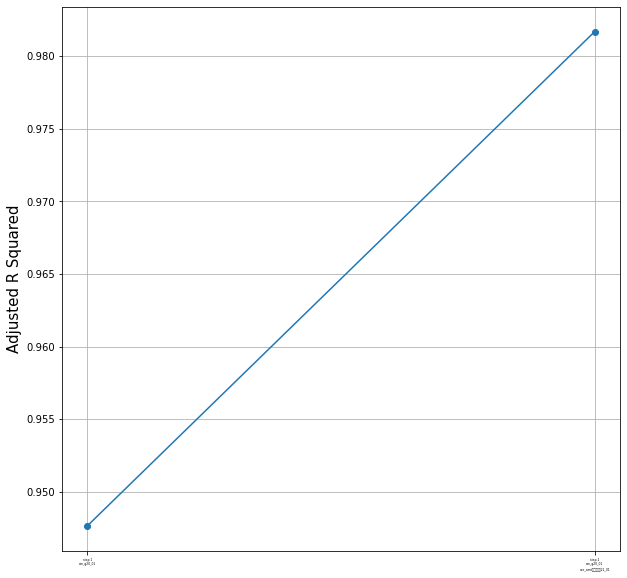

['em_g20_01', 'use_amt아시아음식21_01']
02


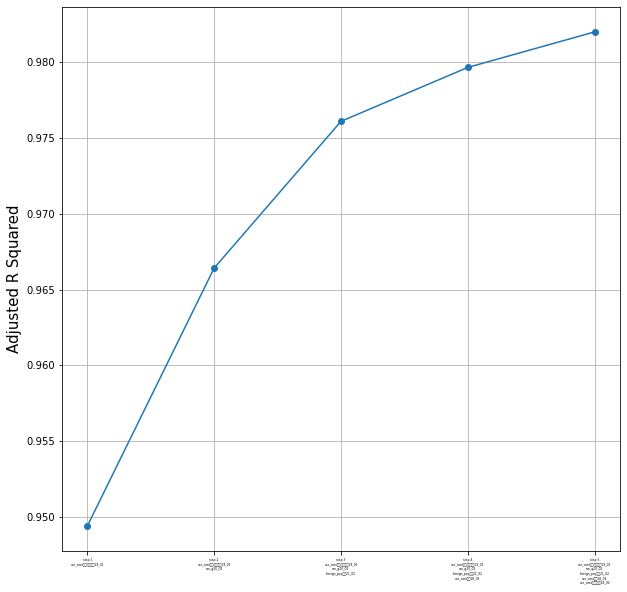

['use_amt마트/슈퍼마켓19_02', 'em_g20_02', 'foreign_pop여성21_02', 'use_amt식품18_02', 'use_amt패스트푸드18_02']


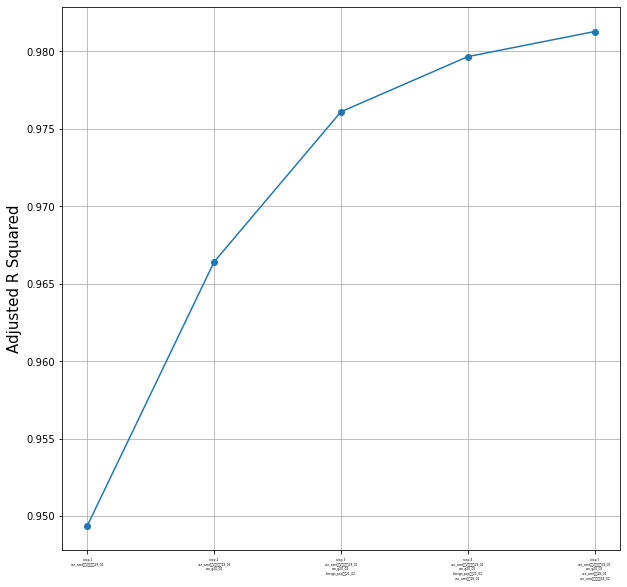

['use_amt마트/슈퍼마켓19_02', 'em_g20_02', 'use_amt식품18_02', 'use_amt패스트푸드18_02']
03


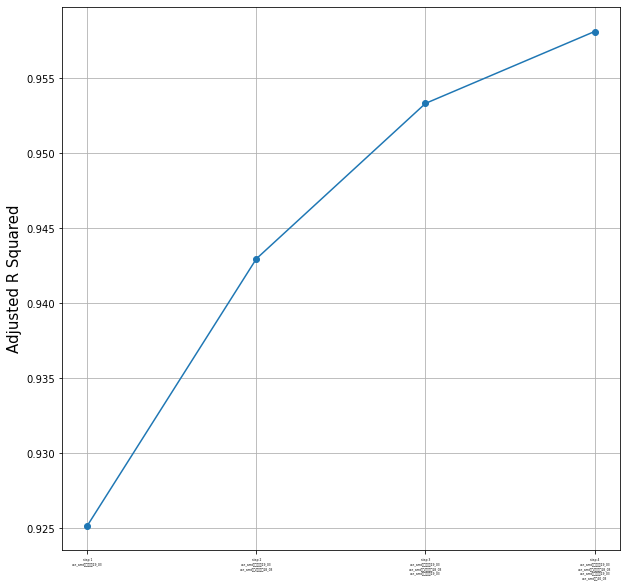

['use_amt패스트푸드19_03', 'use_amt마트/슈퍼마켓18_03', 'use_amt농축수산물19_03', 'use_amt양식20_03']


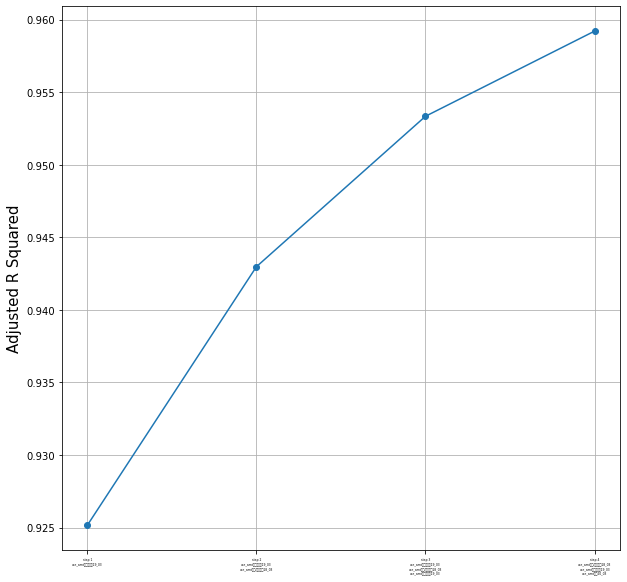

['use_amt마트/슈퍼마켓18_03', 'use_amt농축수산물19_03', 'use_amt양식20_03']
04


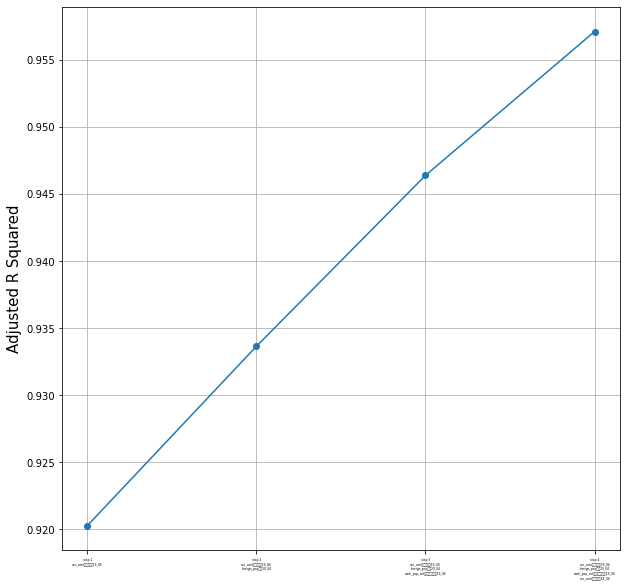

['use_amt패스트푸드19_04', 'foreign_pop남성20_04', 'work_pop_cnt내국인여성제주19_04', 'use_amt패스트푸드18_04']


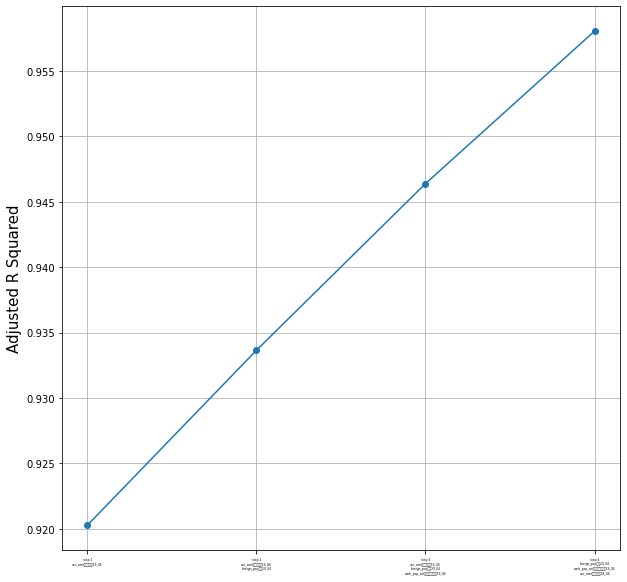

['foreign_pop남성20_04', 'work_pop_cnt내국인여성제주19_04', 'use_amt패스트푸드18_04']
05


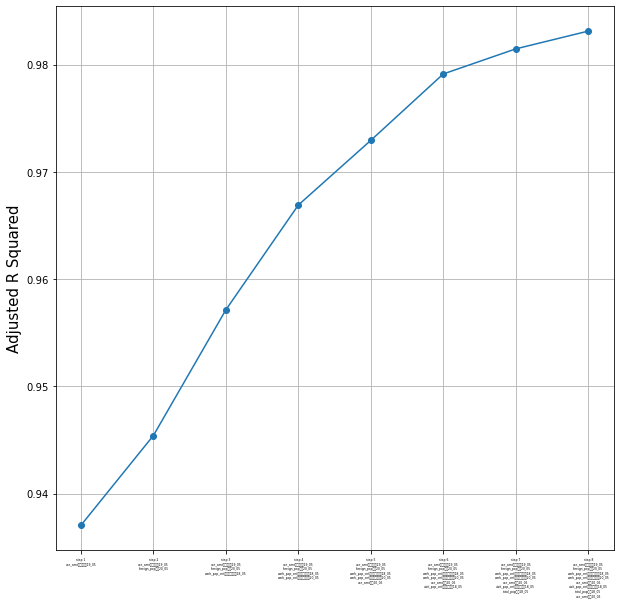

['use_amt패스트푸드19_05', 'foreign_pop남성20_05', 'work_pop_cnt내국인여성그외18_05', 'work_pop_cnt내국인남성그외20_05', 'use_amt부페20_05', 'visit_pop_cnt장기해외그외18_05', 'total_pop여성18_05', 'use_amt양식20_05']


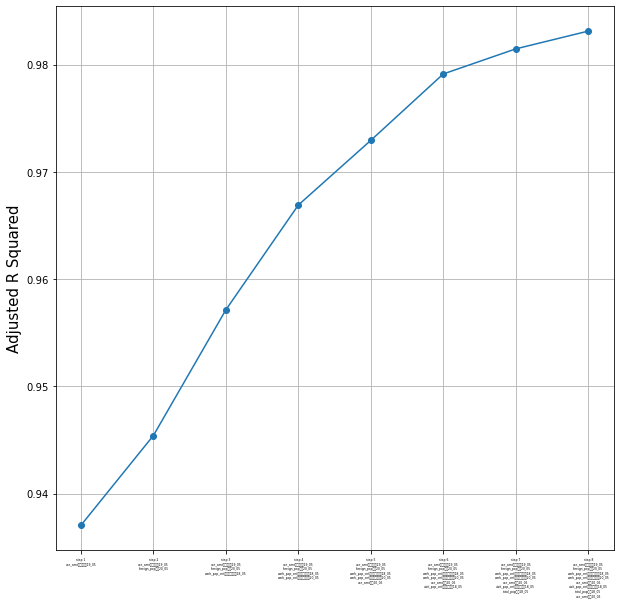

['use_amt패스트푸드19_05', 'foreign_pop남성20_05', 'work_pop_cnt내국인여성그외18_05', 'work_pop_cnt내국인남성그외20_05', 'use_amt부페20_05', 'visit_pop_cnt장기해외그외18_05', 'total_pop여성18_05', 'use_amt양식20_05']
06


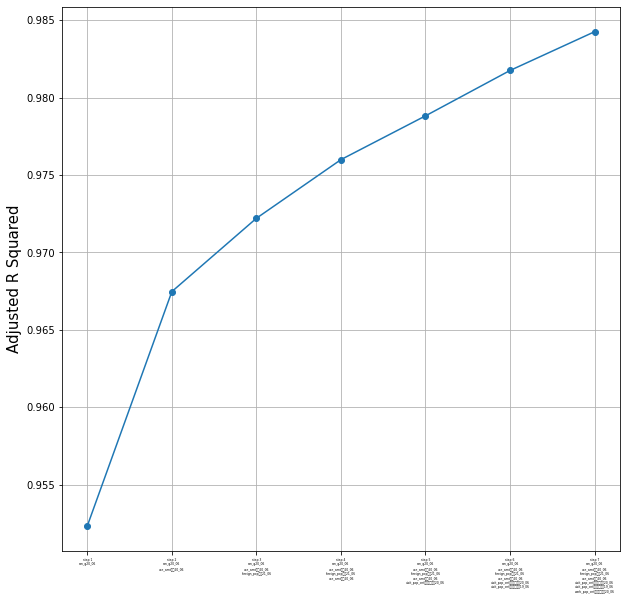

['em_g20_06', 'use_amt식품20_06', 'foreign_pop남성21_06', 'use_amt부페20_06', 'visit_pop_cnt장기해외그외20_06', 'visit_pop_cnt장기해외그외19_06', 'work_pop_cnt장기해외제주20_06']


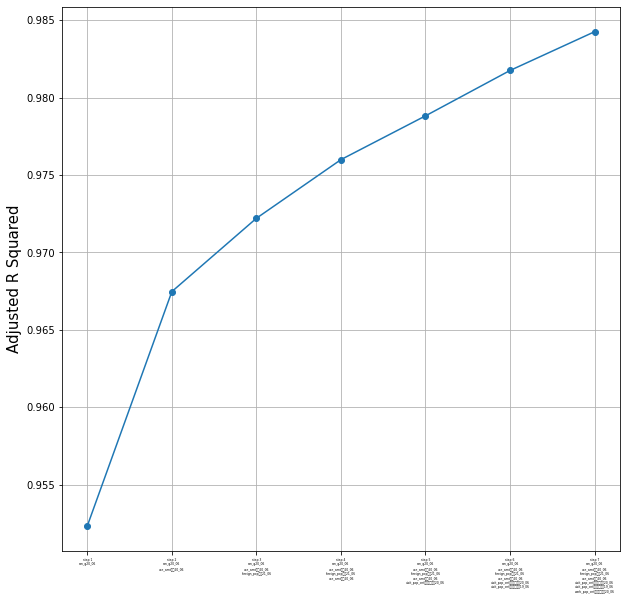

['em_g20_06', 'use_amt식품20_06', 'foreign_pop남성21_06', 'use_amt부페20_06', 'visit_pop_cnt장기해외그외20_06', 'visit_pop_cnt장기해외그외19_06', 'work_pop_cnt장기해외제주20_06']
07


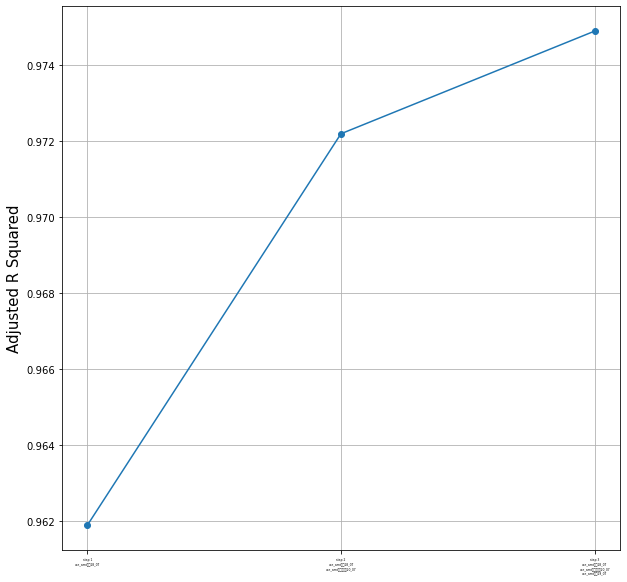

['use_amt한식18_07', 'use_amt농축수산물20_07', 'use_amt양식19_07']


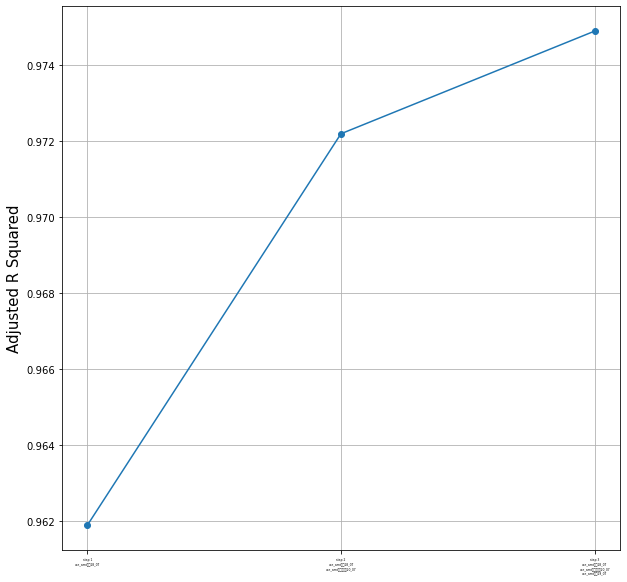

['use_amt한식18_07', 'use_amt농축수산물20_07', 'use_amt양식19_07']
08


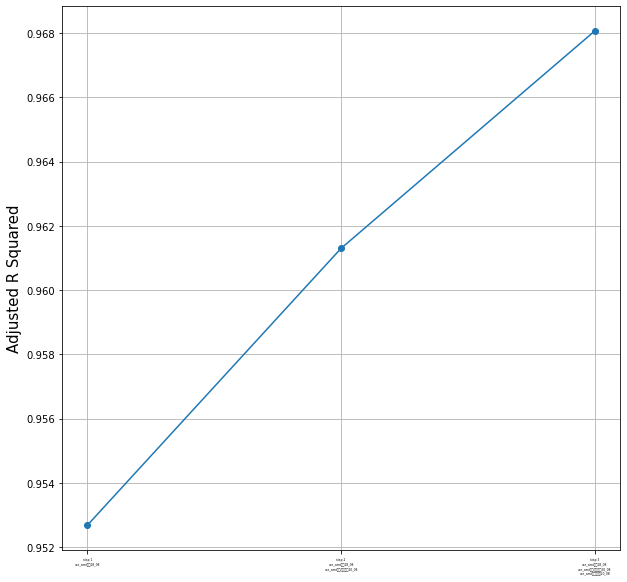

['use_amt한식18_08', 'use_amt마트/슈퍼마켓20_08', 'use_amt농축수산물20_08']


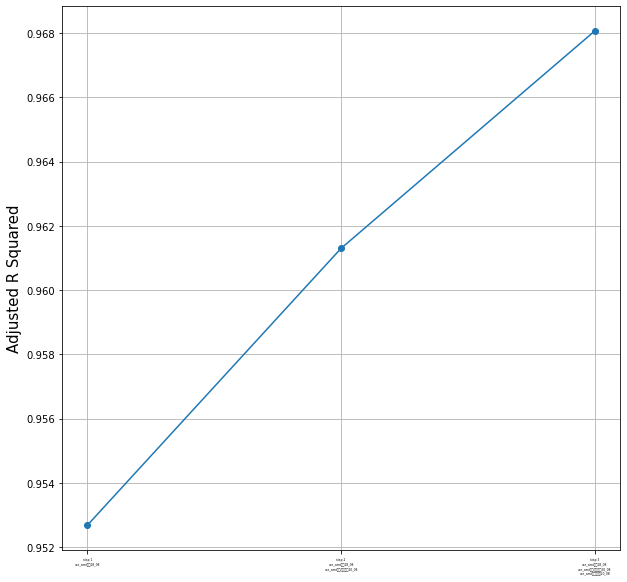

['use_amt한식18_08', 'use_amt마트/슈퍼마켓20_08', 'use_amt농축수산물20_08']
09


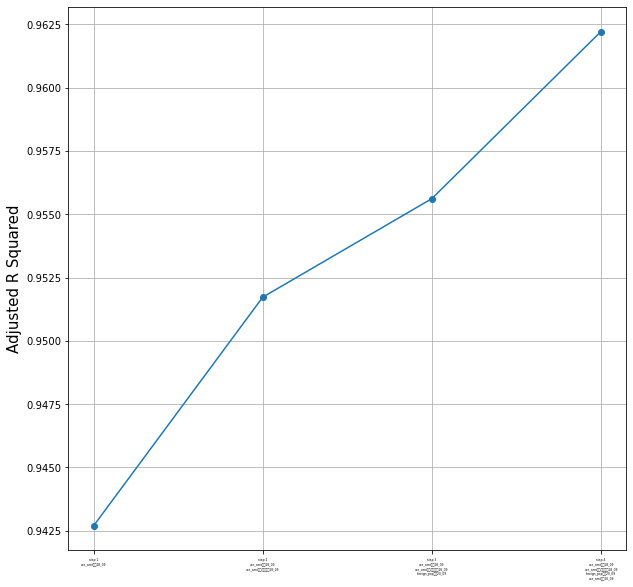

['use_amt한식18_09', 'use_amt마트/슈퍼마켓18_09', 'foreign_pop남성20_09', 'use_amt한식20_09']


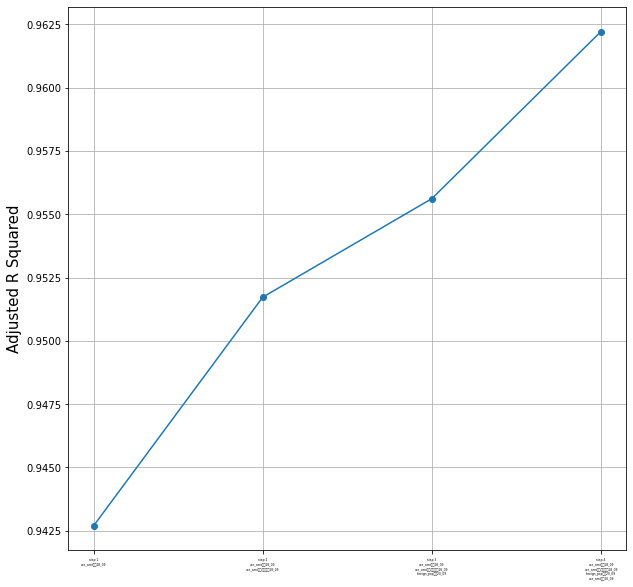

['use_amt한식18_09', 'use_amt마트/슈퍼마켓18_09', 'foreign_pop남성20_09', 'use_amt한식20_09']
10


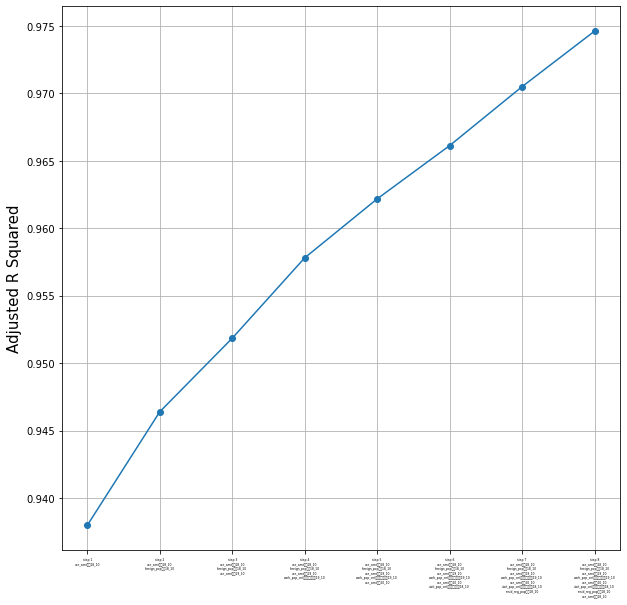

['use_amt한식18_10', 'foreign_pop남성18_10', 'use_amt양식19_10', 'work_pop_cnt내국인여성그외19_10', 'use_amt부페20_10', 'visit_pop_cnt내국인여성그외18_10', 'resid_reg_pop여성18_10', 'use_amt간식18_10']


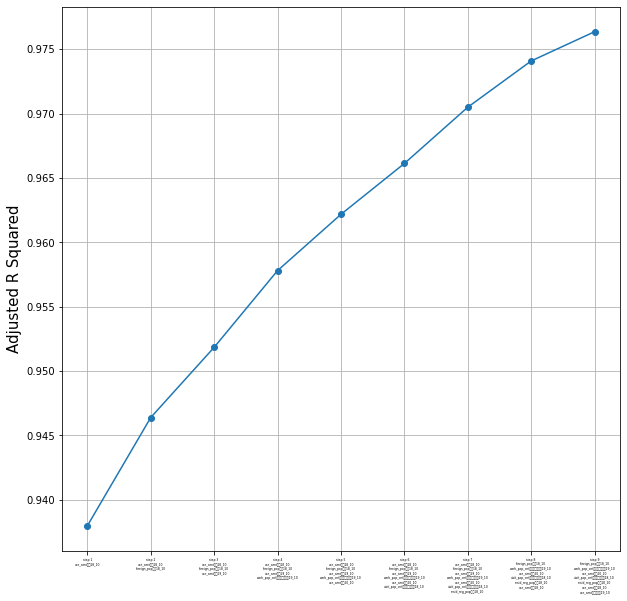

['foreign_pop남성18_10', 'work_pop_cnt내국인여성그외19_10', 'use_amt부페20_10', 'visit_pop_cnt내국인여성그외18_10', 'resid_reg_pop여성18_10', 'use_amt간식18_10', 'use_amt아시아음식19_10']
11


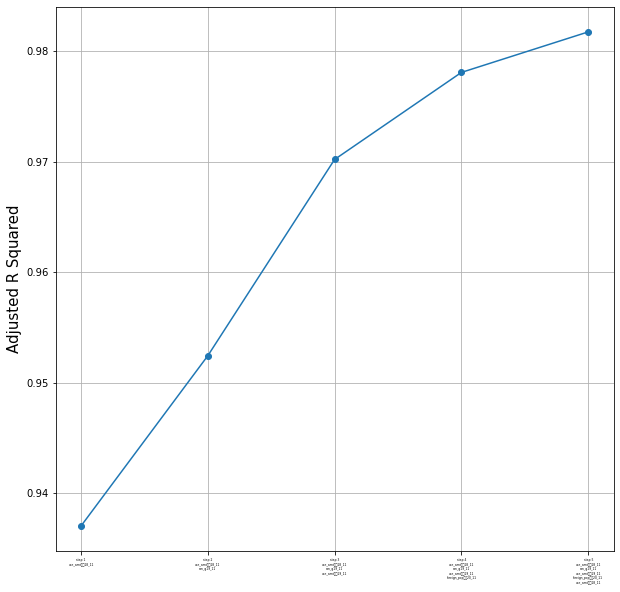

['use_amt한식18_11', 'em_g19_11', 'use_amt식품19_11', 'foreign_pop남성20_11', 'use_amt부페18_11']


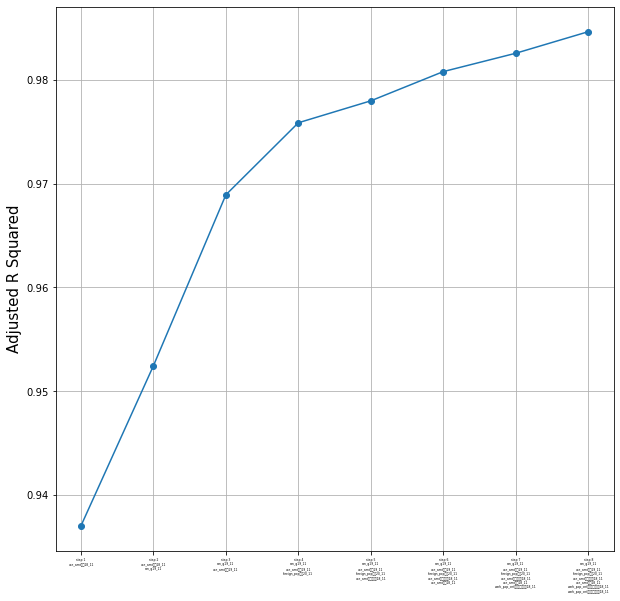

['em_g19_11', 'use_amt식품19_11', 'foreign_pop여성20_11', 'use_amt패스트푸드18_11', 'use_amt부페18_11', 'work_pop_cnt내국인여성그외18_11', 'work_pop_cnt내국인남성그외18_11']
12


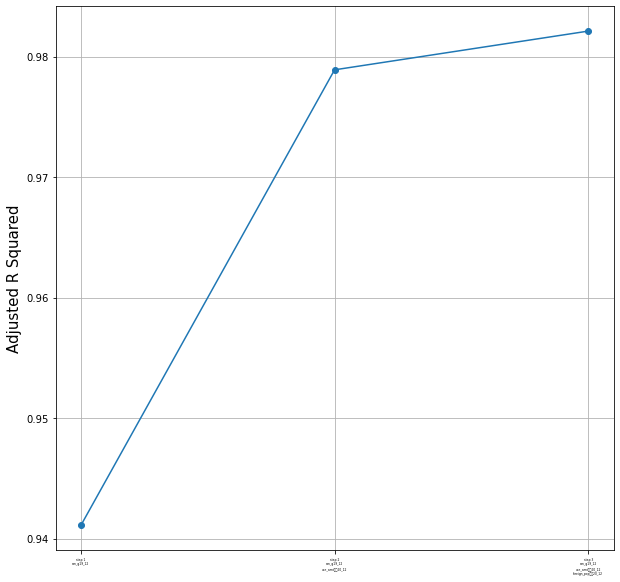

['em_g19_12', 'use_amt식품20_12', 'foreign_pop여성20_12']


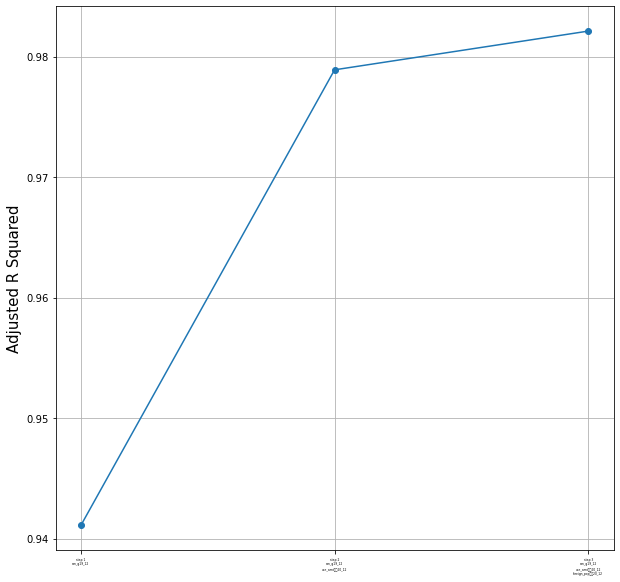

['em_g19_12', 'use_amt식품20_12', 'foreign_pop여성20_12']


,0,1,2,3,4,5,6,7
01fore,em_g20_01,use_amt아시아음식21_01,None,None,None,None,None,None
01step,em_g20_01,use_amt아시아음식21_01,None,None,None,None,None,None
02fore,use_amt마트/슈퍼마켓19_02,em_g20_02,foreign_pop여성21_02,use_amt식품18_02,use_amt패스트푸드18_02,None,None,None
02step,use_amt마트/슈퍼마켓19_02,em_g20_02,use_amt식품18_02,use_amt패스트푸드18_02,None,None,None,None
03fore,use_amt패스트푸드19_03,use_amt마트/슈퍼마켓18_03,use_amt농축수산물19_03,use_amt양식20_03,None,None,None,None
03step,use_amt마트/슈퍼마켓18_03,use_amt농축수산물19_03,use_amt양식20_03,None,None,None,None,None
04fore,use_amt패스트푸드19_04,foreign_pop남성20_04,work_pop_cnt내국인여성제주19_04,use_amt패스트푸드18_04,None,None,None,None
04step,foreign_pop남성20_04,work_pop_cnt내국인여성제주19_04,use_amt패스트푸드18_04,None,None,None,None,None
05fore,use_amt패스트푸드19_05,foreign_pop남성20_05,work_pop_cnt내국인여성그외18_05,work_pop_cnt내국인남성그외20_05,use_amt부페20_05,visit_pop_cnt장기해외그외18_05,total_pop여성18_05,use_amt양식20_05
05step,use_amt패스트푸드19_05,foreign_pop남성20_05,work_pop_cnt내국인여성그외18_05,work_pop_cnt내국인남성그외20_05,use_amt부페20_05,visit_pop_cnt장기해외그외18_05,total_pop여성18_05,use_amt양식20_05


In [9]:
#A월 변수로 A월 예측 칼럼만 뽑기

dic={ }

selected_list=[]
for j in ['01','02','03','04','05','06','07','08','09','10','11','12']:
    month=[]
    
    for i in merge_scale.columns.tolist():
        if i[-2:] == j:
            month.append(i)
    merge_scale[month]

    print(j)
    if j in ['01','02','03','04','05','06']:
        print(forward_select('em_g21_'+j, merge_scale[month]))
        dic[j+'fore'] = selected_variables
                    #print(backward_select('em_g21_'+j, merge_scale[month]))
        print(stepwise_select('em_g21_'+j, merge_scale[month]))
        dic[j+'step'] = selected_variables
    elif j in ['07','08','09','10','11','12']:
        print(forward_select('em_g20_'+j, merge_scale[month]))
        dic[j+'fore'] = selected_variables
                    #print(backward_select('em_g21_'+j, merge_scale[month]))
        print(stepwise_select('em_g20_'+j, merge_scale[month]))
        dic[j+'step'] = selected_variables

#데이터프레임으로 만들고 저장
select_result = pd.DataFrame.from_dict(dic, orient='index')
select_result.to_csv('배출량과 배출비용 뺀 전진단계별 결과.csv',encoding='cp949')
select_result

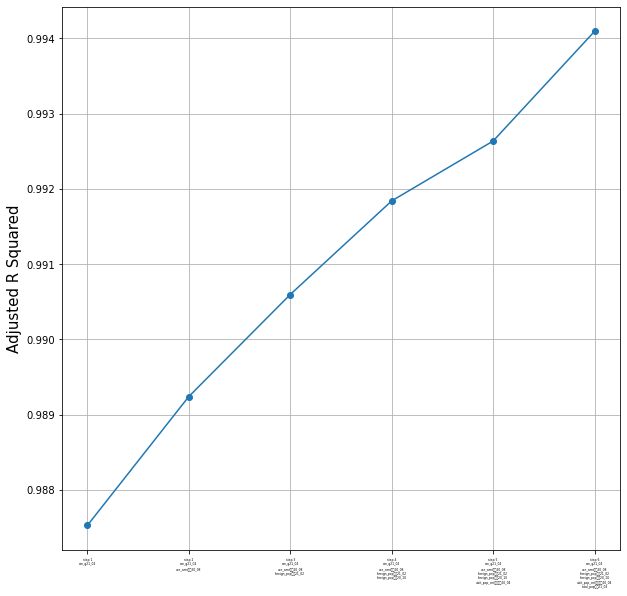

['em_g21_04', 'use_amt부페20_08', 'foreign_pop남성21_02', 'foreign_pop남성20_10', 'visit_pop_cnt단기해외20_04', 'total_pop남성21_03']


{'21_06step': ['em_g21_04',
  'use_amt부페20_08',
  'foreign_pop남성21_02',
  'foreign_pop남성20_10',
  'visit_pop_cnt단기해외20_04',
  'total_pop남성21_03']}

In [10]:
#A월 변수로 A-1월 예측 칼럼만 뽑기
#21년 6월 예측하기위해, 21년 6월 다 없애기

dic={ }

for j in ['21_06']:#,'21_05','21_04','21_03','21_02','21_01']:
    #삭제할 칼럼 있으면 선택
    delete=[]
    for i in merge_scale.columns.tolist():
        if not i[-5:] ==j:    ##
            delete.append(i)
    delete.append('em_g'+j)       ##

    print(stepwise_select('em_g'+j, merge_scale[delete]))
    dic[j+'step'] = selected_variables
dic

In [11]:
select_result = pd.DataFrame.from_dict(dic, orient='index')
select_result.to_csv('A-1월 변수선택.csv',encoding='cp949')
select_result

,0,1,2,3,4,5
21_06step,em_g21_04,use_amt부페20_08,foreign_pop남성21_02,foreign_pop남성20_10,visit_pop_cnt단기해외20_04,total_pop남성21_03


# 2. 동단위

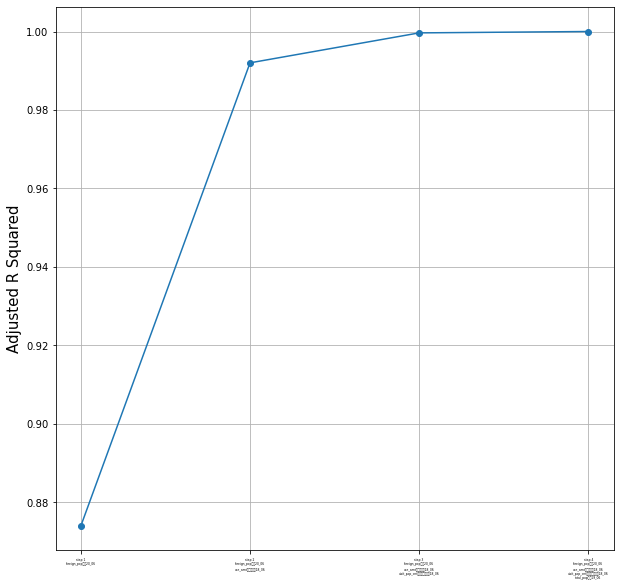

['foreign_pop여성20_06', 'use_amt농축수산물18_06', 'visit_pop_cnt내국인남성그외18_06', 'total_pop여성19_06']


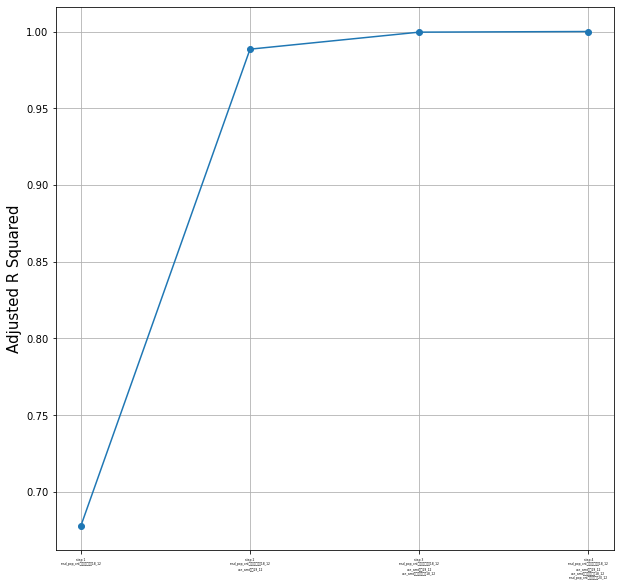

['resd_pop_cnt내국인남성제주18_12', 'use_amt양식19_12', 'use_amt주점및주류판매18_12', 'resd_pop_cnt장기해외제주20_12']


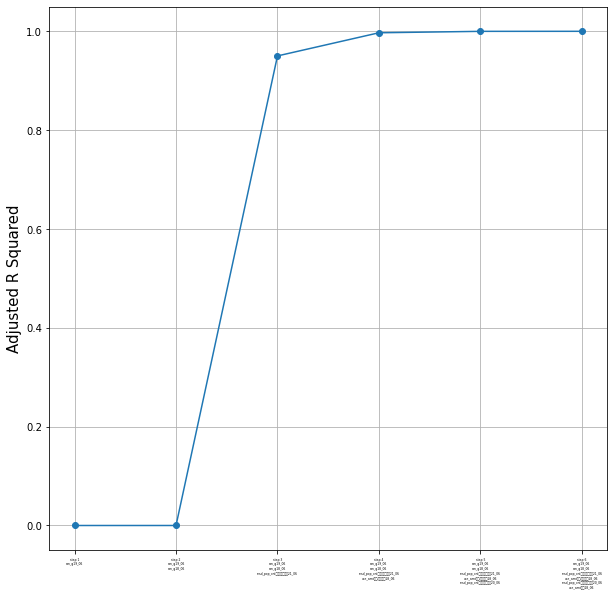

['em_g19_06', 'em_g18_06', 'resd_pop_cnt내국인남성제주21_06', 'use_amt마트/슈퍼마켓18_06', 'resd_pop_cnt내국인남성제주20_06', 'use_amt한식18_06']


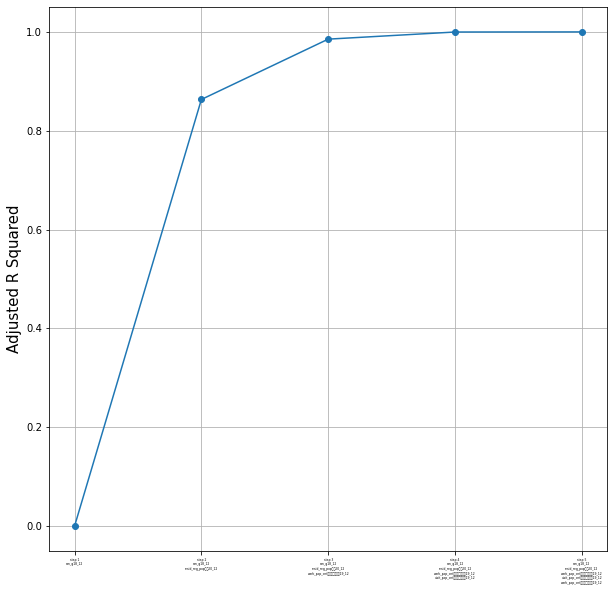

['em_g18_12', 'resid_reg_pop남성20_12', 'work_pop_cnt내국인여성제주19_12', 'visit_pop_cnt내국인남성그외19_12', 'work_pop_cnt내국인여성그외19_12']


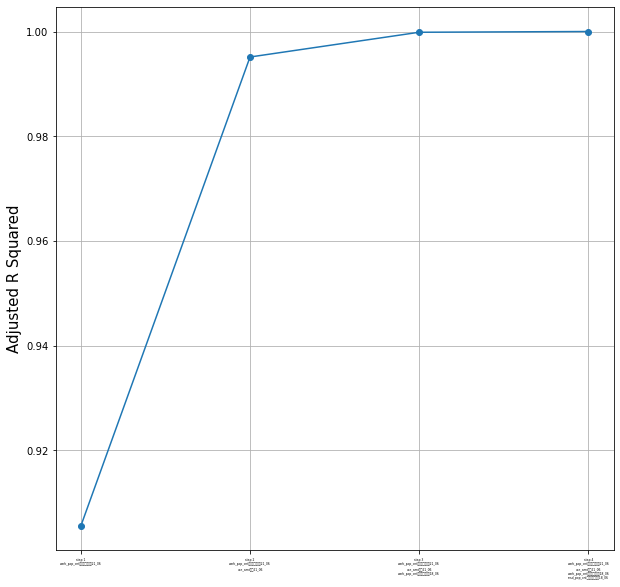

['work_pop_cnt내국인여성제주21_06', 'use_amt식품21_06', 'work_pop_cnt내국인여성제주18_06', 'resd_pop_cnt내국인여성제주18_06']


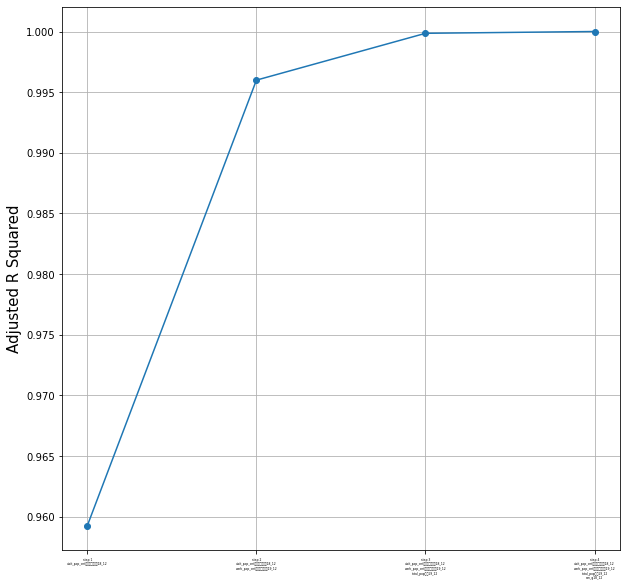

['visit_pop_cnt내국인남성제주18_12', 'work_pop_cnt내국인남성제주19_12', 'total_pop남성19_12', 'em_g18_12']


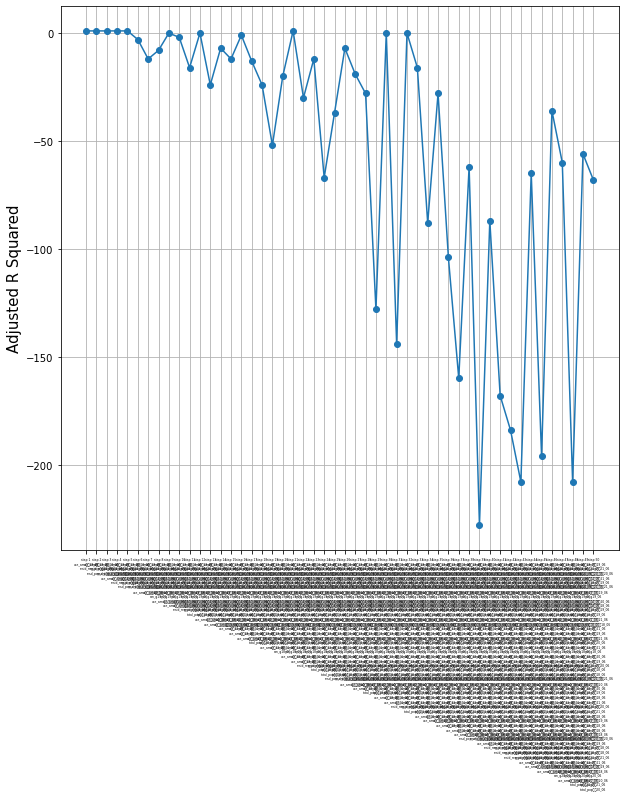

['use_amt간식19_06', 'resid_reg_pop남성21_06', 'resd_pop_cnt내국인남성제주20_06', 'use_amt마트/슈퍼마켓21_06', 'resid_reg_pop남성19_06', 'resd_pop_cnt내국인남성제주21_06', 'use_amt패스트푸드19_06', 'em_g19_06', 'use_amt마트/슈퍼마켓20_06', 'use_amt마트/슈퍼마켓18_06', 'resid_reg_pop여성19_06', 'total_pop여성19_06', 'use_amt패스트푸드21_06', 'use_amt주점및주류판매18_06', 'use_amt배달21_06', 'use_amt양식19_06', 'use_amt아시아음식21_06', 'total_pop여성20_06', 'use_amt한식21_06', 'em_g18_06', 'use_amt한식20_06', 'use_amt식품19_06', 'resid_reg_pop남성20_06', 'total_pop여성18_06', 'total_pop남성18_06', 'resd_pop_cnt내국인여성제주21_06', 'use_amt아시아음식20_06', 'use_amt간식20_06', 'total_pop남성19_06', 'use_amt식품18_06', 'use_amt간식21_06', 'resid_reg_pop여성20_06', 'total_pop남성21_06', 'use_amt양식18_06', 'use_amt아시아음식19_06', 'use_amt간식18_06', 'use_amt한식18_06', 'use_amt아시아음식18_06', 'resd_pop_cnt내국인여성제주20_06', 'use_amt한식19_06', 'resid_reg_pop여성18_06', 'resid_reg_pop남성18_06', 'resid_reg_pop여성21_06', 'use_amt식품21_06', 'use_amt마트/슈퍼마켓19_06', 'use_amt패스트푸드18_06', 'em_g20_06', 'use_amt패스트푸드20_06', '

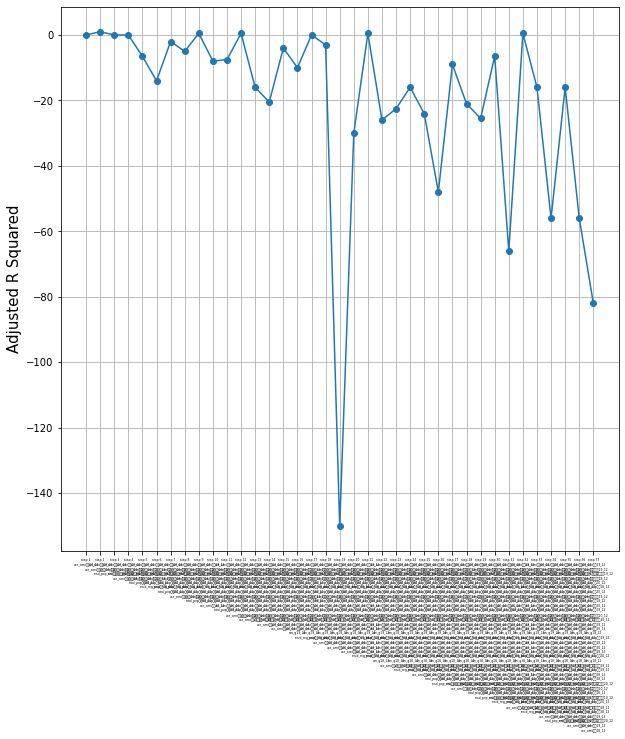

['use_amt식품19_12', 'use_amt아시아음식19_12', 'resd_pop_cnt내국인남성제주19_12', 'use_amt아시아음식18_12', 'total_pop남성20_12', 'resid_reg_pop여성18_12', 'total_pop여성20_12', 'use_amt패스트푸드19_12', 'total_pop여성19_12', 'use_amt배달20_12', 'total_pop남성19_12', 'use_amt패스트푸드20_12', 'use_amt마트/슈퍼마켓20_12', 'use_amt양식19_12', 'use_amt한식20_12', 'em_g19_12', 'resid_reg_pop남성19_12', 'use_amt간식18_12', 'use_amt간식20_12', 'use_amt식품18_12', 'resid_reg_pop여성20_12', 'em_g18_12', 'use_amt마트/슈퍼마켓19_12', 'resid_reg_pop여성19_12', 'use_amt양식18_12', 'total_pop남성18_12', 'resd_pop_cnt내국인여성제주20_12', 'use_amt아시아음식20_12', 'total_pop여성18_12', 'resd_pop_cnt내국인여성제주19_12', 'resid_reg_pop남성20_12', 'use_amt마트/슈퍼마켓18_12', 'resid_reg_pop남성18_12', 'use_amt간식19_12', 'resd_pop_cnt내국인남성제주20_12', 'use_amt한식19_12', 'use_amt한식18_12']


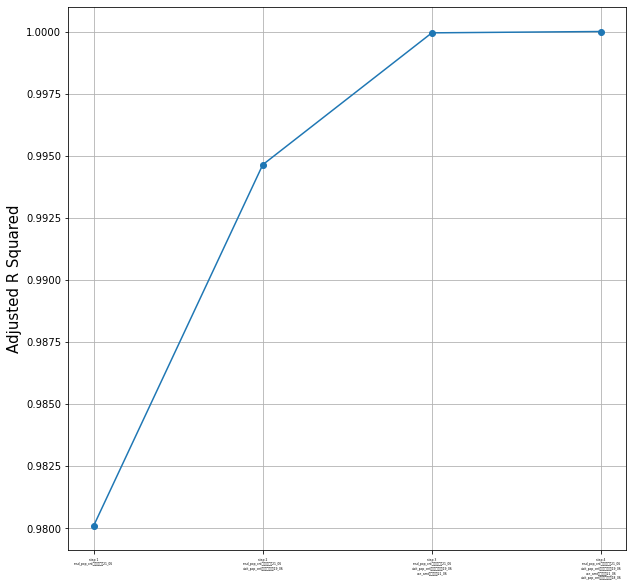

['resd_pop_cnt장기해외제주21_06', 'visit_pop_cnt내국인남성그외19_06', 'use_amt농축수산물21_06', 'visit_pop_cnt내국인남성제주18_06']


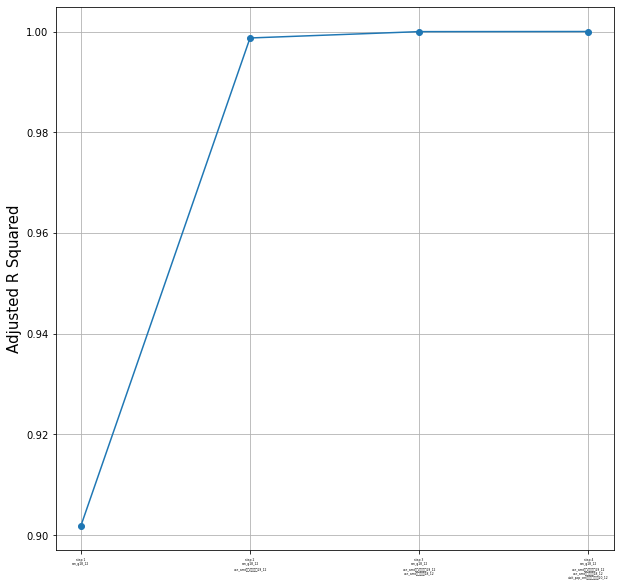

['em_g18_12', 'use_amt마트/슈퍼마켓19_12', 'use_amt농축수산물18_12', 'visit_pop_cnt내국인남성제주20_12']


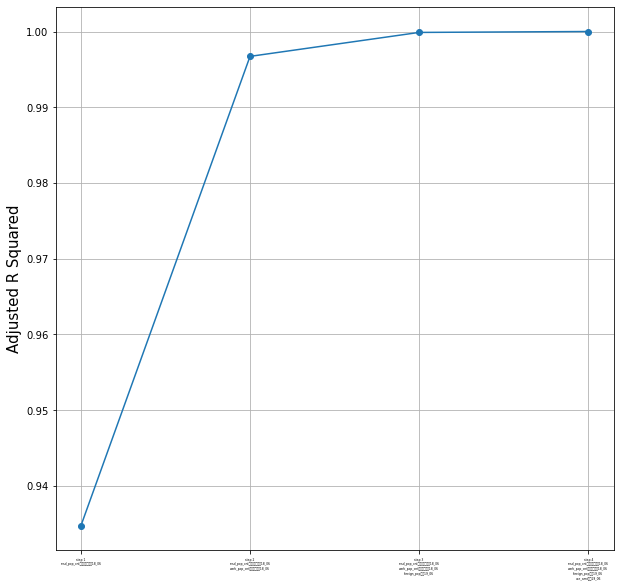

['resd_pop_cnt내국인남성제주18_06', 'work_pop_cnt장기해외제주18_06', 'foreign_pop남성19_06', 'use_amt부페19_06']


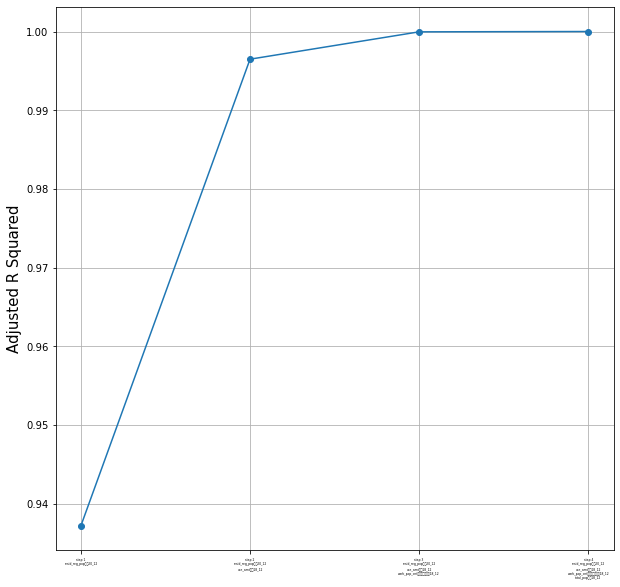

['resid_reg_pop남성20_12', 'use_amt부페18_12', 'work_pop_cnt내국인남성제주18_12', 'total_pop여성18_12']


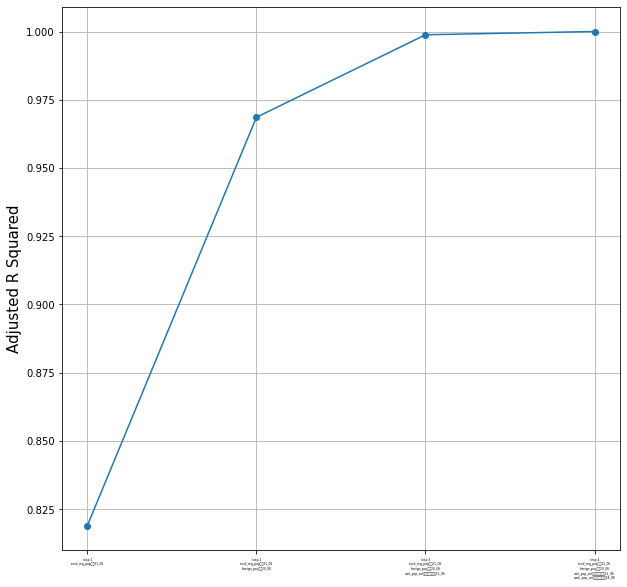

['resid_reg_pop남성21_06', 'foreign_pop남성20_06', 'visit_pop_cnt내국인여성제주21_06', 'work_pop_cnt내국인남성그외18_06']


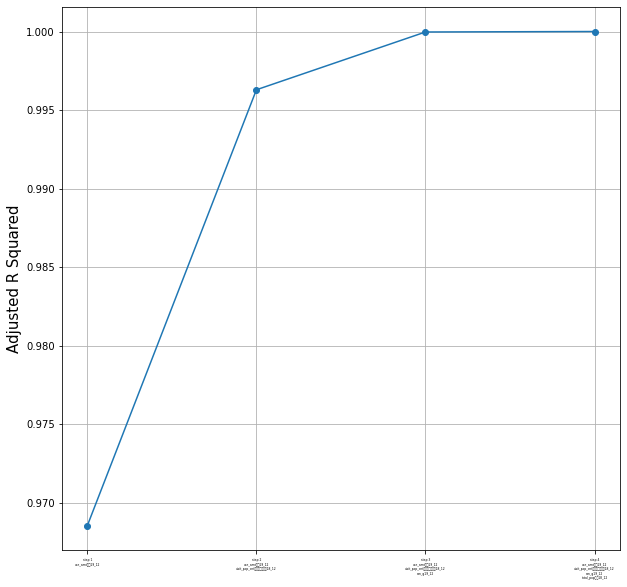

['use_amt양식19_12', 'visit_pop_cnt내국인남성제주18_12', 'em_g19_12', 'total_pop남성18_12']


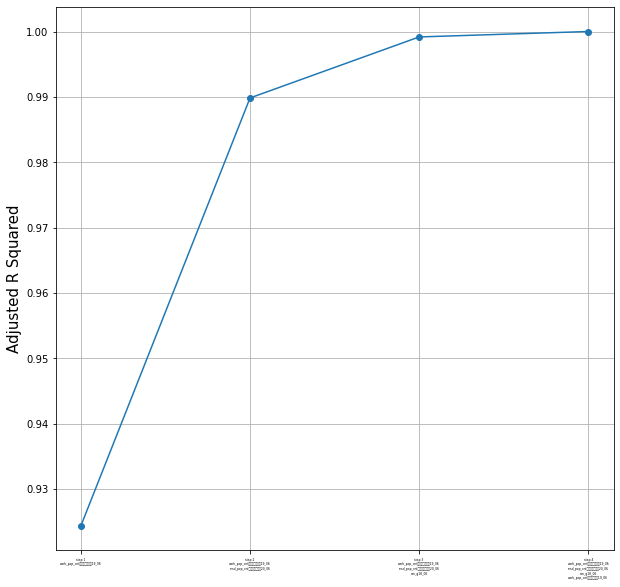

['work_pop_cnt내국인여성제주19_06', 'resd_pop_cnt내국인남성제주20_06', 'em_g18_06', 'work_pop_cnt장기해외제주19_06']


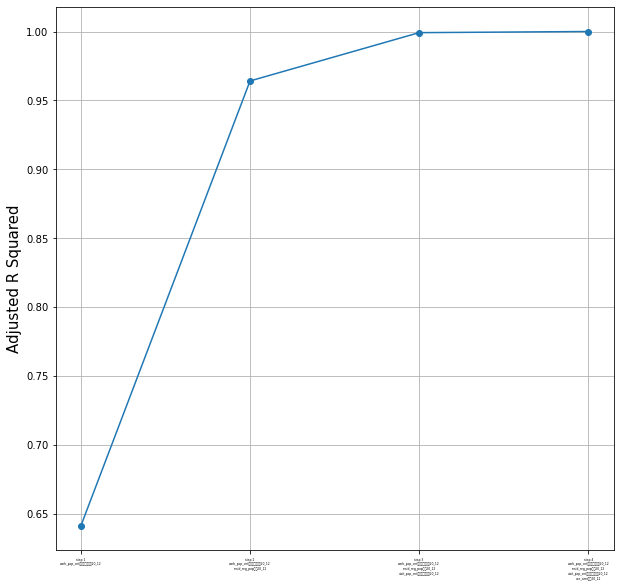

['work_pop_cnt내국인남성제주20_12', 'resid_reg_pop남성20_12', 'visit_pop_cnt내국인여성제주20_12', 'use_amt부페20_12']


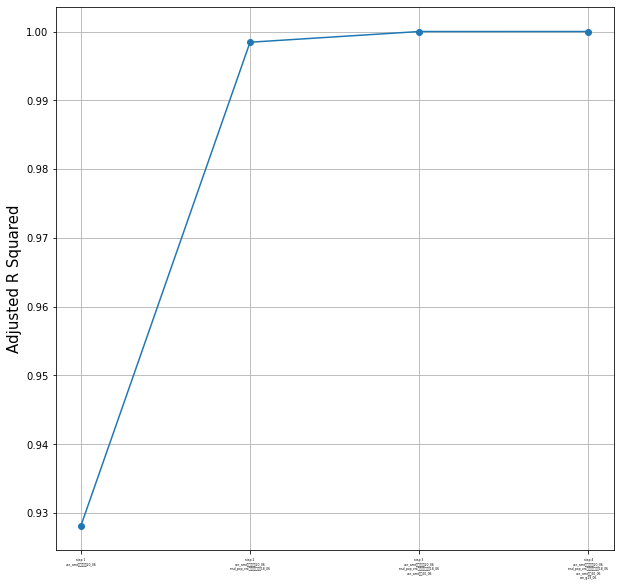

['use_amt패스트푸드20_06', 'resd_pop_cnt내국인여성제주18_06', 'use_amt간식20_06', 'em_g19_06']


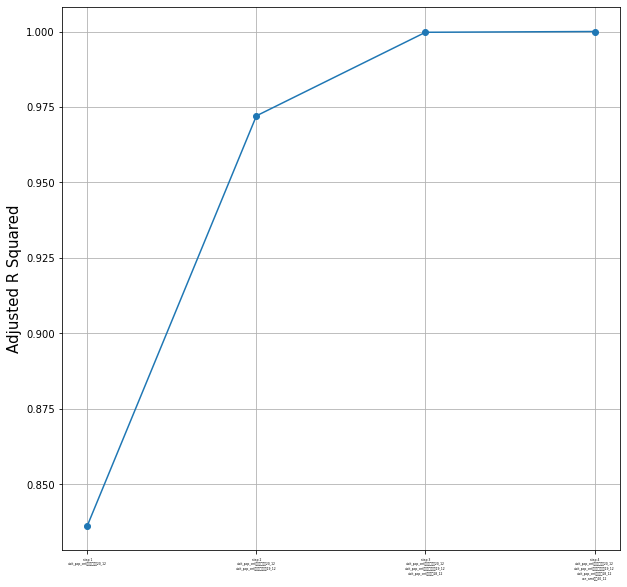

['visit_pop_cnt장기해외제주20_12', 'visit_pop_cnt내국인남성제주19_12', 'visit_pop_cnt단기해외18_12', 'use_amt간식20_12']


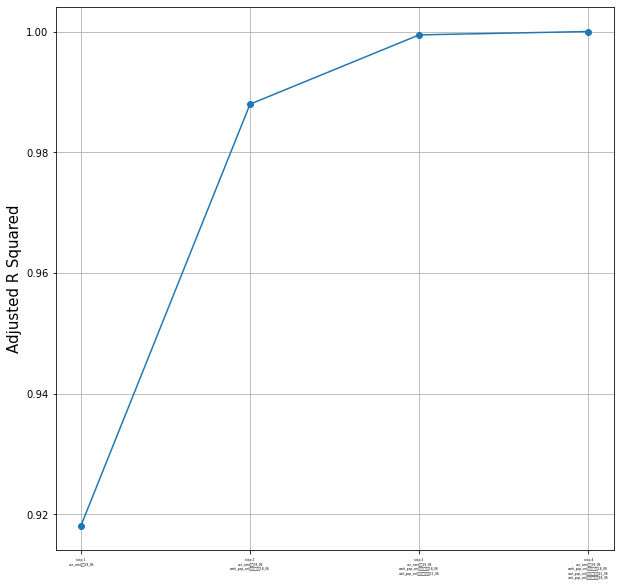

['use_amt배달19_06', 'work_pop_cnt장기해외제주18_06', 'visit_pop_cnt내국인여성제주21_06', 'visit_pop_cnt내국인여성제주18_06']


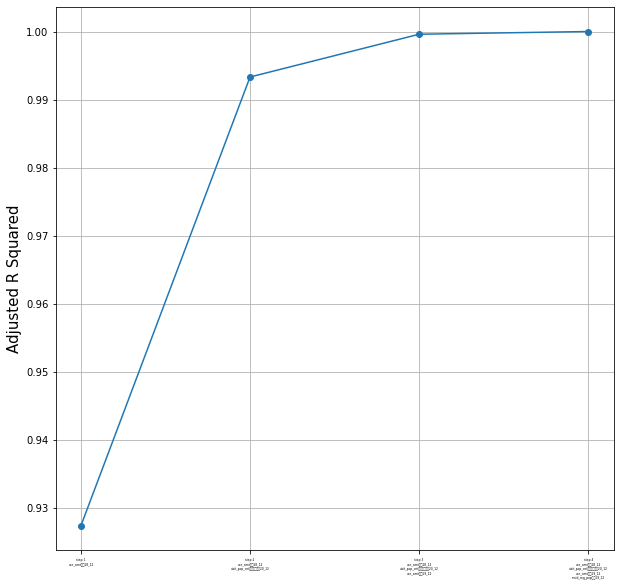

['use_amt한식18_12', 'visit_pop_cnt장기해외그외20_12', 'use_amt양식19_12', 'resid_reg_pop여성19_12']


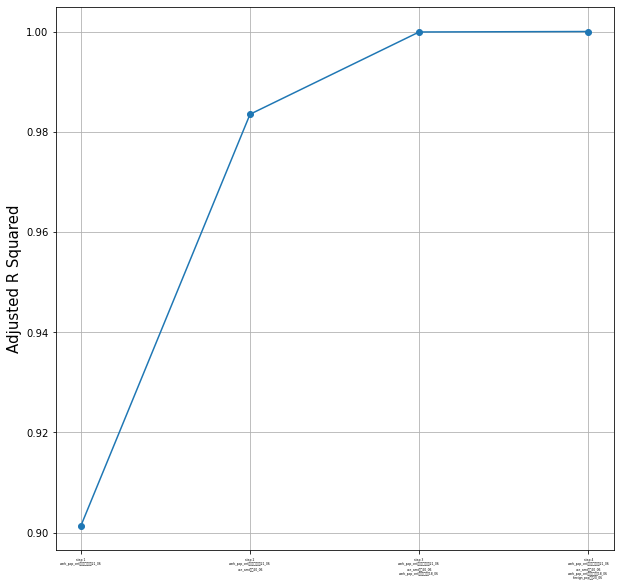

['work_pop_cnt내국인여성제주21_06', 'use_amt부페20_06', 'work_pop_cnt장기해외그외18_06', 'foreign_pop여성20_06']


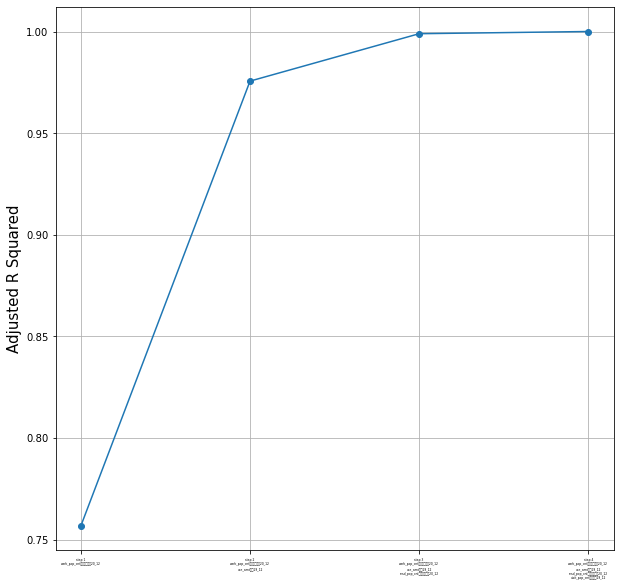

['work_pop_cnt장기해외그외20_12', 'use_amt부페19_12', 'resd_pop_cnt장기해외제주20_12', 'visit_pop_cnt단기해외19_12']


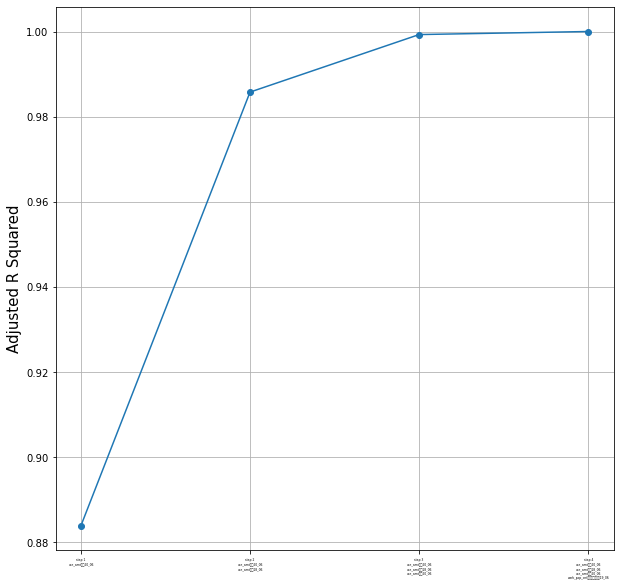

['use_amt간식20_06', 'use_amt간식18_06', 'use_amt부페20_06', 'work_pop_cnt내국인여성제주19_06']


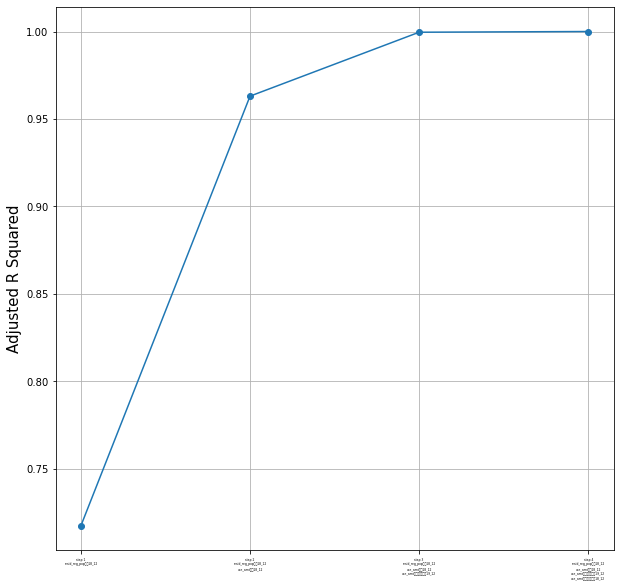

['resid_reg_pop남성18_12', 'use_amt간식18_12', 'use_amt주점및주류판매19_12', 'use_amt주점및주류판매18_12']


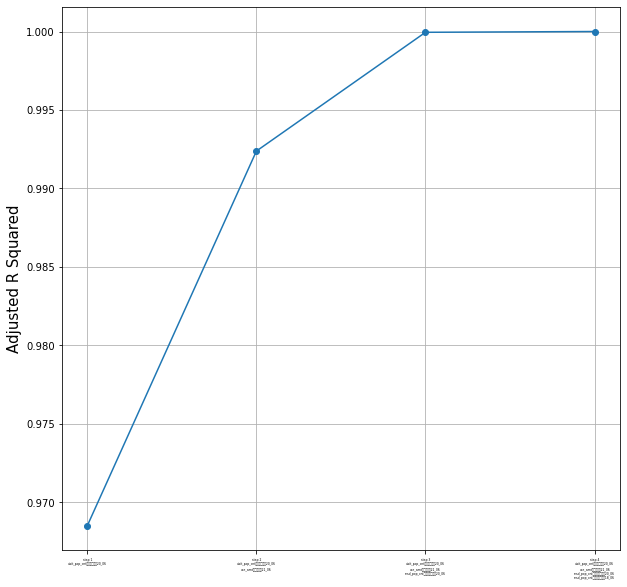

['visit_pop_cnt장기해외그외20_06', 'use_amt농축수산물21_06', 'resd_pop_cnt내국인여성제주20_06', 'resd_pop_cnt내국인여성제주18_06']


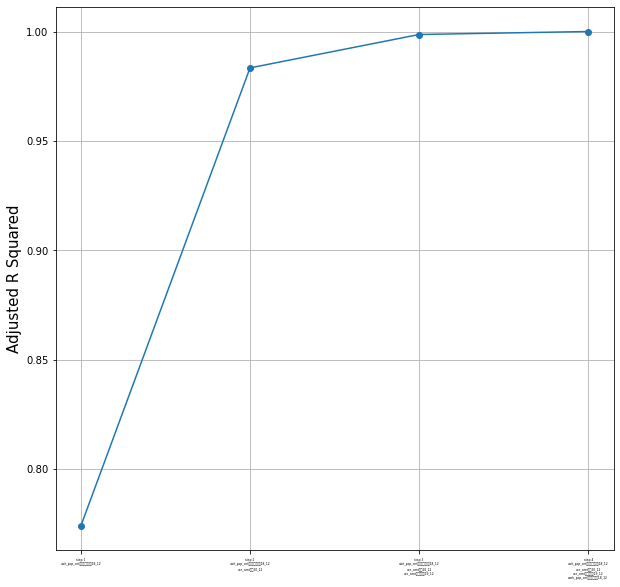

['visit_pop_cnt내국인남성제주18_12', 'use_amt부페20_12', 'use_amt아시아음식19_12', 'work_pop_cnt장기해외그외18_12']


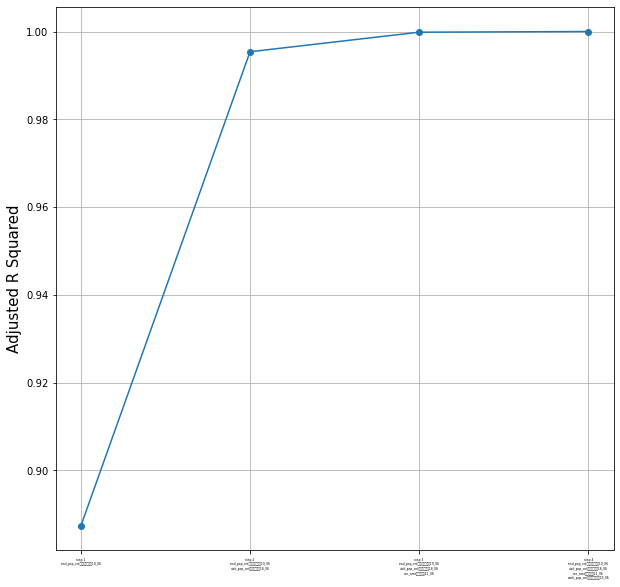

['resd_pop_cnt내국인여성제주19_06', 'visit_pop_cnt장기해외제주18_06', 'use_amt농축수산물21_06', 'work_pop_cnt내국인여성제주19_06']


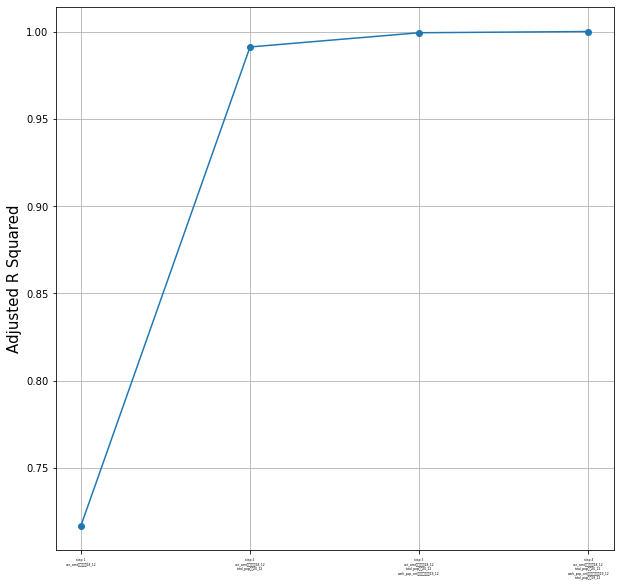

['use_amt패스트푸드18_12', 'total_pop남성20_12', 'work_pop_cnt내국인남성제주19_12', 'total_pop남성19_12']


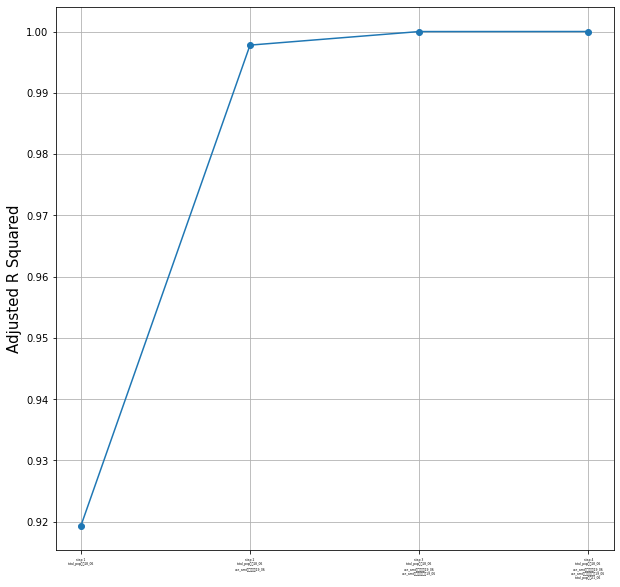

['total_pop남성18_06', 'use_amt아시아음식19_06', 'use_amt주점및주류판매19_06', 'total_pop여성21_06']


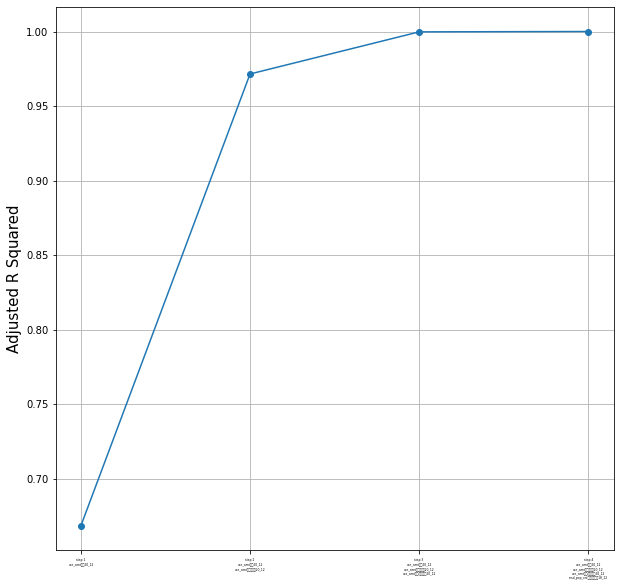

['use_amt식품20_12', 'use_amt패스트푸드20_12', 'use_amt마트/슈퍼마켓20_12', 'resd_pop_cnt장기해외제주18_12']


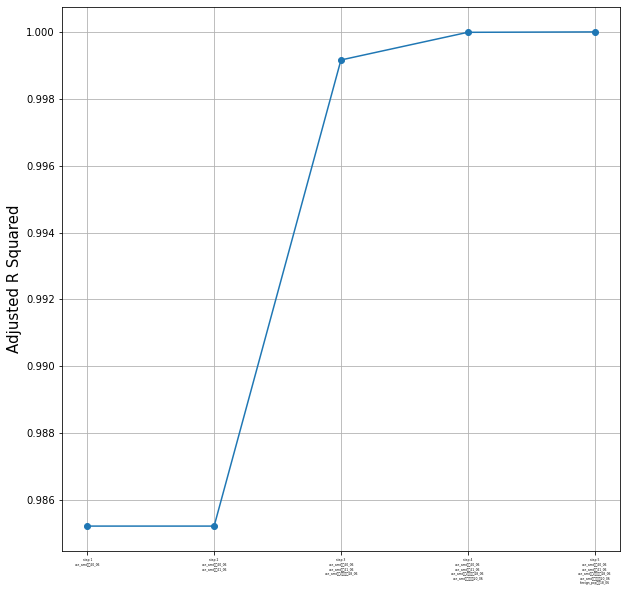

['use_amt한식20_06', 'use_amt부페21_06', 'use_amt마트/슈퍼마켓18_06', 'use_amt패스트푸드20_06', 'foreign_pop여성18_06']


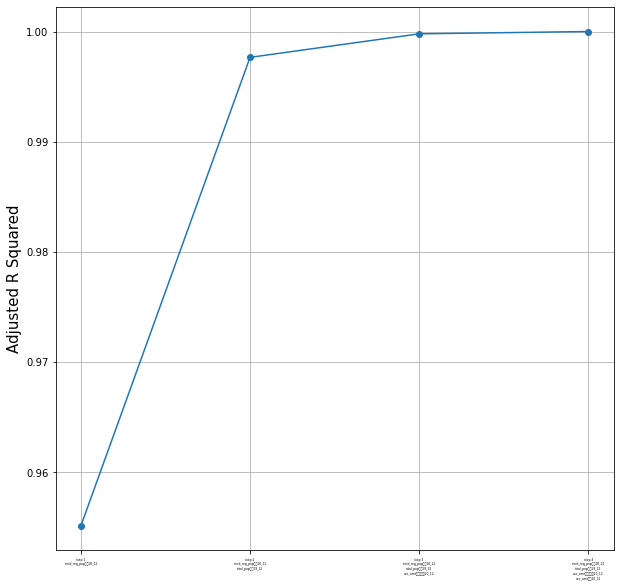

['resid_reg_pop남성18_12', 'total_pop남성19_12', 'use_amt패스트푸드20_12', 'use_amt배달20_12']


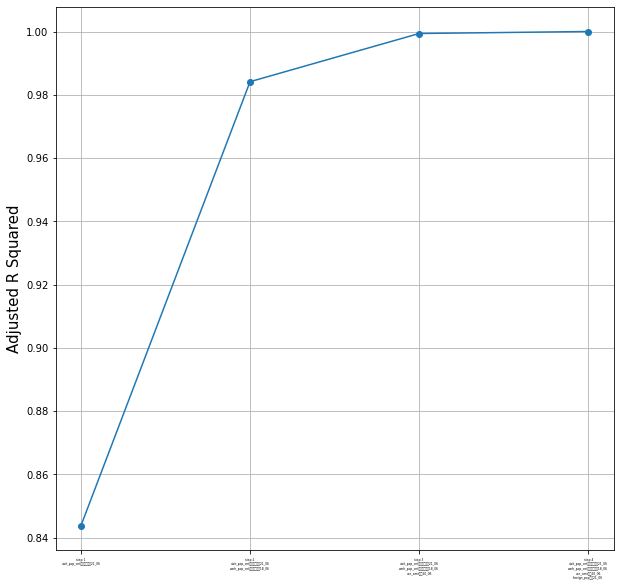

['visit_pop_cnt장기해외그외21_06', 'work_pop_cnt장기해외제주18_06', 'use_amt양식20_06', 'foreign_pop여성21_06']


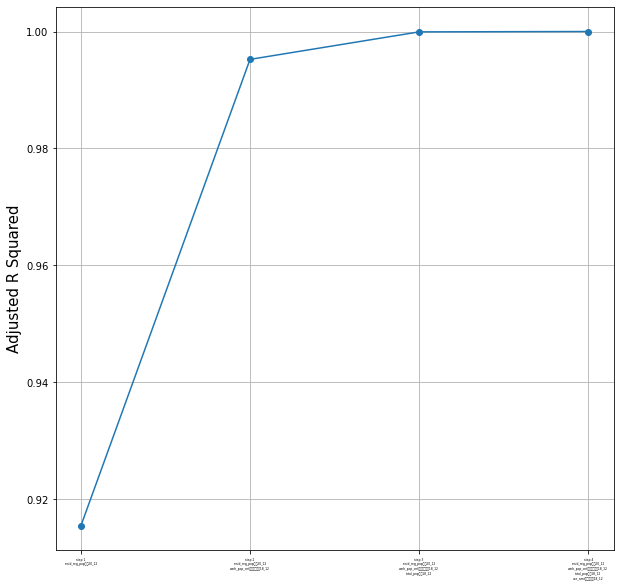

['resid_reg_pop남성20_12', 'work_pop_cnt장기해외제주18_12', 'total_pop남성18_12', 'use_amt아시아음식18_12']


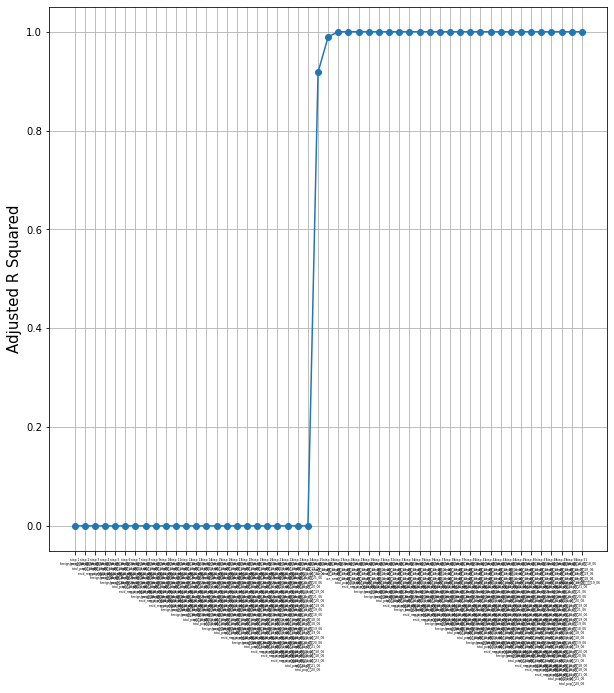

['foreign_pop여성18_06', 'use_amt한식18_06', 'use_amt양식19_06', 'use_amt간식18_06', 'visit_pop_cnt장기해외제주19_06']


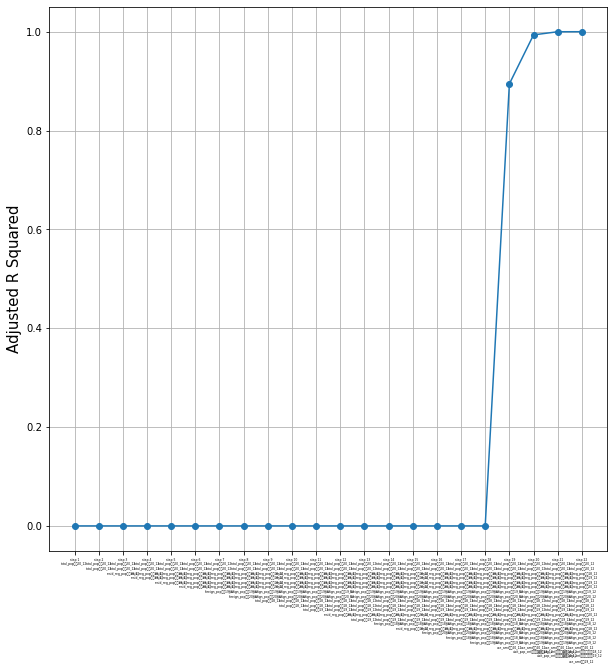

['total_pop남성20_12', 'total_pop여성20_12', 'resid_reg_pop여성18_12', 'resid_reg_pop남성19_12', 'resid_reg_pop여성19_12', 'resid_reg_pop여성20_12', 'foreign_pop여성19_12', 'foreign_pop남성20_12', 'total_pop여성18_12', 'total_pop남성18_12', 'total_pop남성19_12', 'resid_reg_pop남성20_12', 'total_pop여성19_12', 'foreign_pop남성18_12', 'resid_reg_pop남성18_12', 'foreign_pop여성20_12', 'foreign_pop여성18_12', 'foreign_pop남성19_12', 'use_amt배달20_12', 'visit_pop_cnt내국인남성그외18_12', 'visit_pop_cnt내국인남성제주19_12', 'use_amt간식19_12']


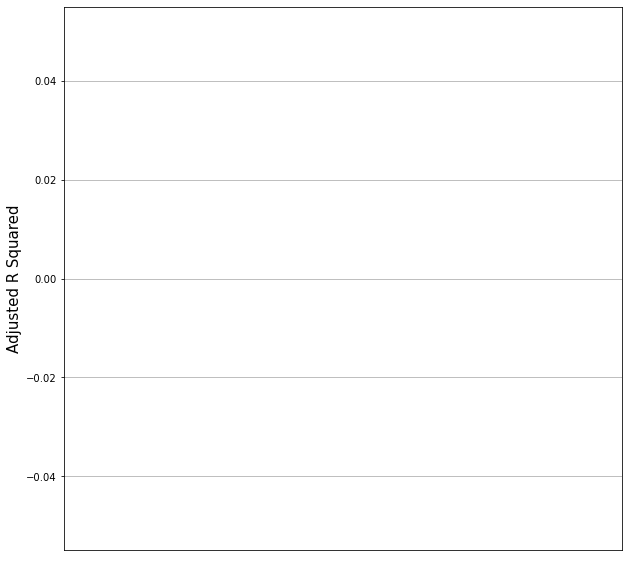

[]


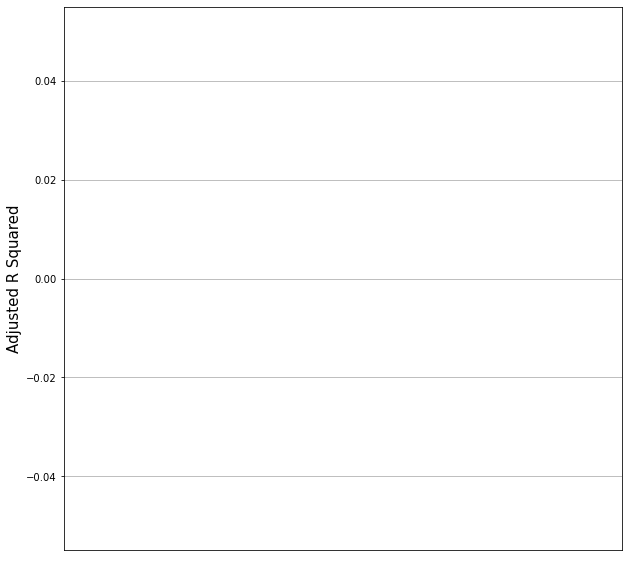

[]


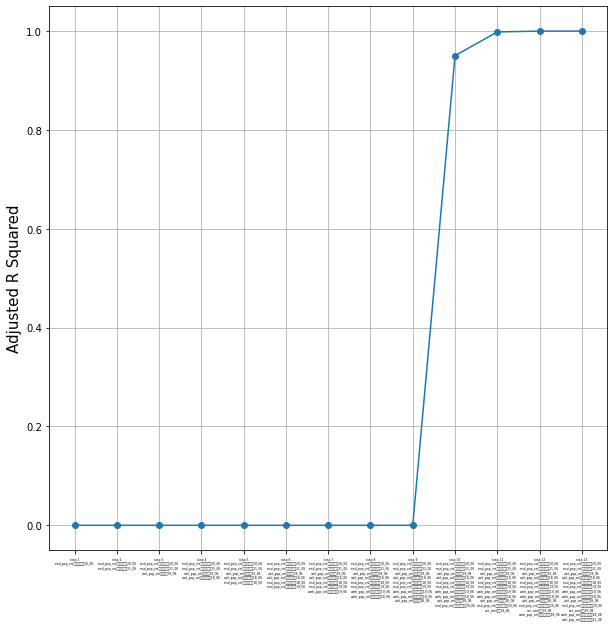

['resd_pop_cnt장기해외제주20_06', 'resd_pop_cnt장기해외제주21_06', 'visit_pop_cnt단기해외19_06', 'visit_pop_cnt장기해외제주18_06', 'resd_pop_cnt장기해외제주18_06', 'resd_pop_cnt장기해외제주19_06', 'work_pop_cnt장기해외제주19_06', 'work_pop_cnt장기해외제주18_06', 'visit_pop_cnt단기해외18_06', 'resd_pop_cnt내국인여성제주20_06', 'use_amt부페19_06', 'work_pop_cnt내국인남성제주18_06', 'visit_pop_cnt내국인남성그외21_06']


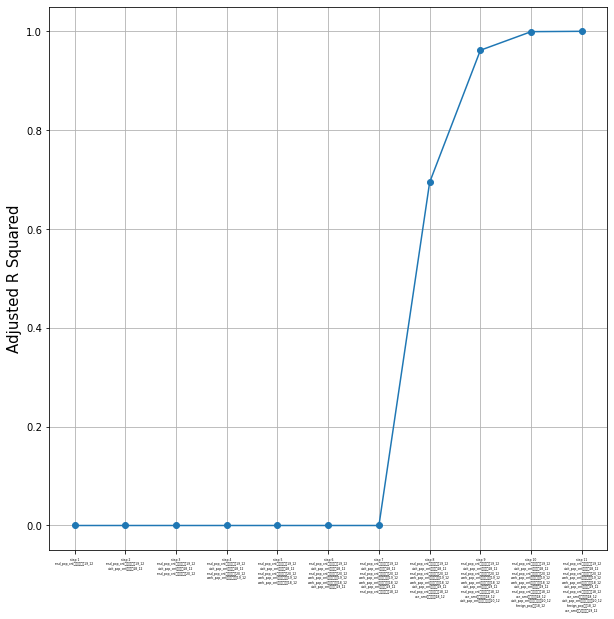

['resd_pop_cnt장기해외제주19_12', 'visit_pop_cnt단기해외18_12', 'resd_pop_cnt장기해외제주20_12', 'work_pop_cnt장기해외제주19_12', 'work_pop_cnt장기해외제주18_12', 'visit_pop_cnt단기해외19_12', 'resd_pop_cnt장기해외제주18_12', 'use_amt농축수산물18_12', 'visit_pop_cnt내국인여성그외20_12', 'foreign_pop남성18_12', 'use_amt마트/슈퍼마켓19_12']


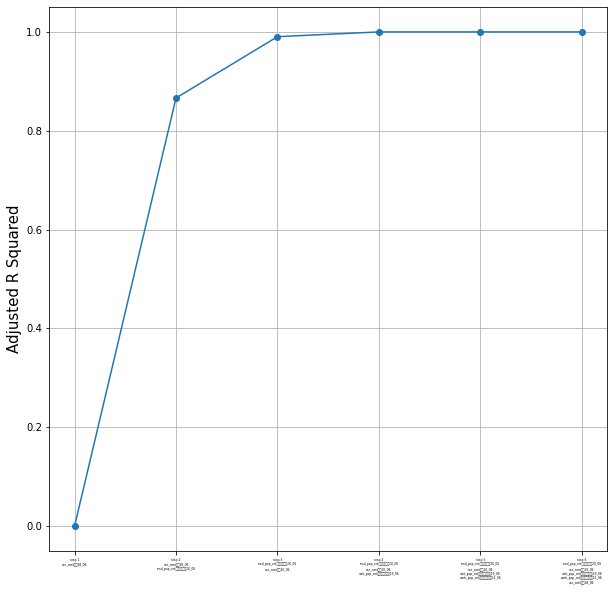

['resd_pop_cnt장기해외제주20_06', 'use_amt간식20_06', 'visit_pop_cnt내국인남성제주19_06', 'work_pop_cnt내국인여성그외21_06', 'use_amt배달18_06']


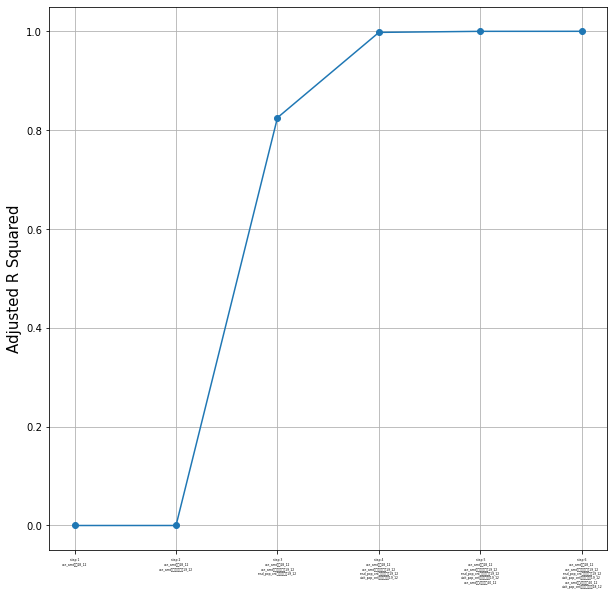

['use_amt배달18_12', 'use_amt주점및주류판매19_12', 'resd_pop_cnt장기해외제주19_12', 'visit_pop_cnt장기해외그외19_12', 'use_amt마트/슈퍼마켓20_12', 'visit_pop_cnt내국인남성제주18_12']


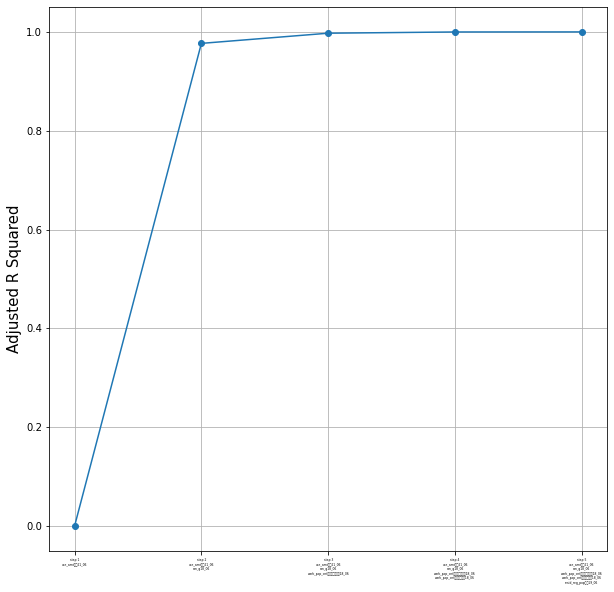

['use_amt부페21_06', 'em_g18_06', 'work_pop_cnt내국인남성그외18_06', 'work_pop_cnt장기해외제주18_06', 'resid_reg_pop여성19_06']


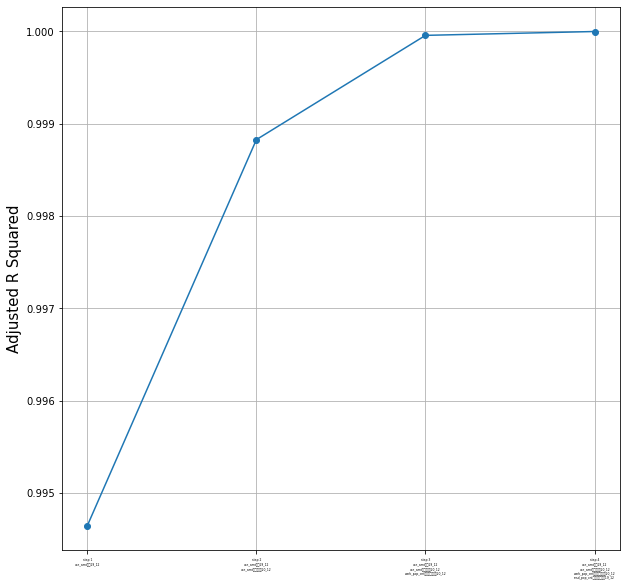

['use_amt부페19_12', 'use_amt패스트푸드20_12', 'work_pop_cnt내국인여성그외20_12', 'resd_pop_cnt내국인여성제주19_12']


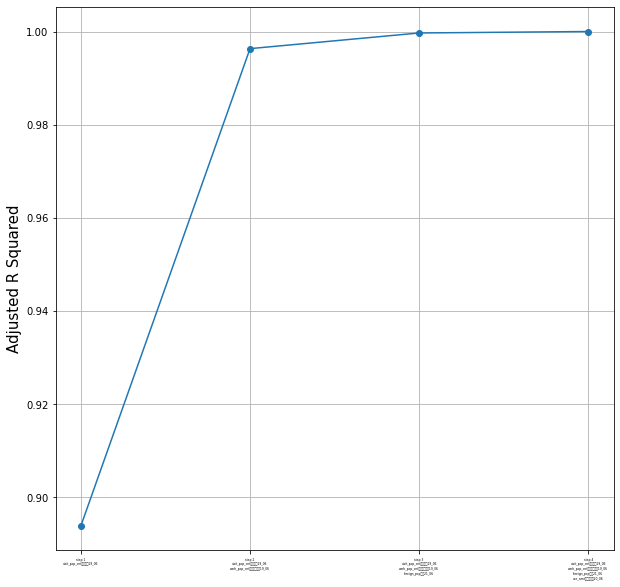

['visit_pop_cnt단기해외19_06', 'work_pop_cnt장기해외제주19_06', 'foreign_pop남성21_06', 'use_amt패스트푸드20_06']


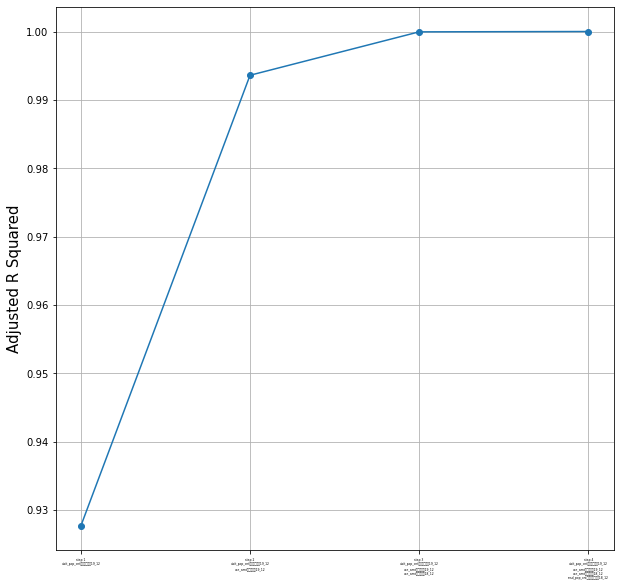

['visit_pop_cnt장기해외그외19_12', 'use_amt농축수산물19_12', 'use_amt패스트푸드18_12', 'resd_pop_cnt내국인남성제주18_12']


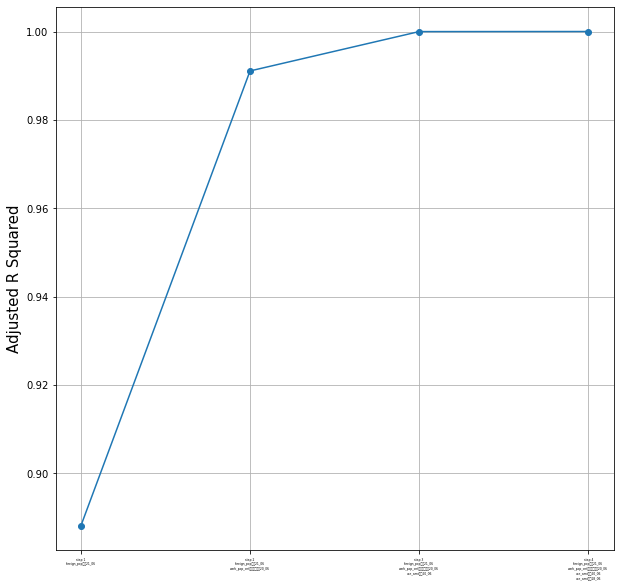

['foreign_pop남성21_06', 'work_pop_cnt장기해외그외20_06', 'use_amt부페20_06', 'use_amt한식18_06']


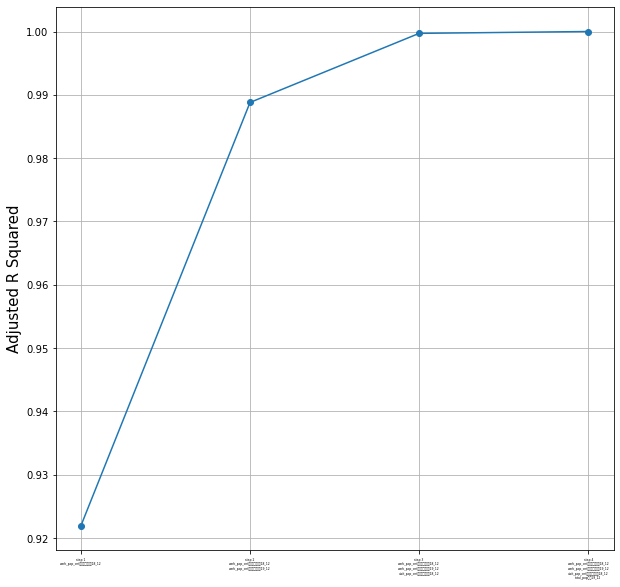

['work_pop_cnt내국인여성제주18_12', 'work_pop_cnt내국인남성그외19_12', 'visit_pop_cnt내국인남성제주18_12', 'total_pop남성19_12']


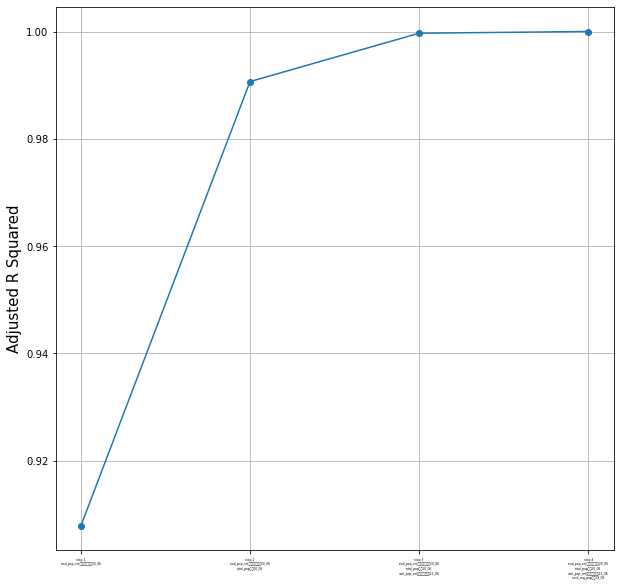

['resd_pop_cnt내국인여성제주20_06', 'total_pop여성20_06', 'visit_pop_cnt내국인남성그외21_06', 'resid_reg_pop남성19_06']


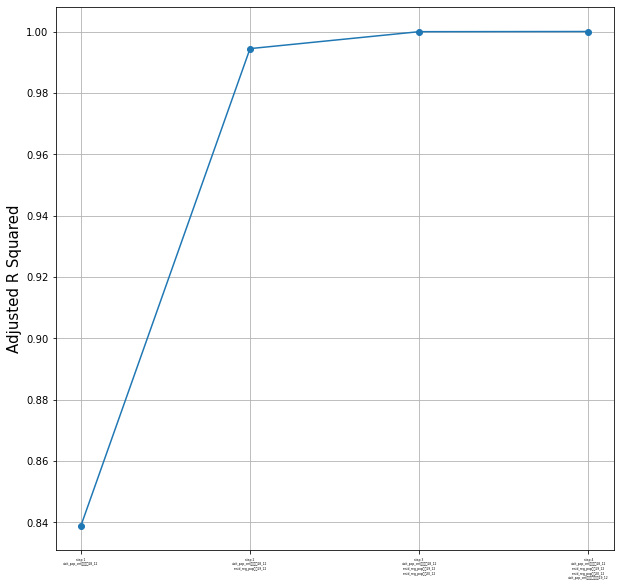

['visit_pop_cnt단기해외18_12', 'resid_reg_pop남성19_12', 'resid_reg_pop여성20_12', 'visit_pop_cnt내국인남성그외19_12']


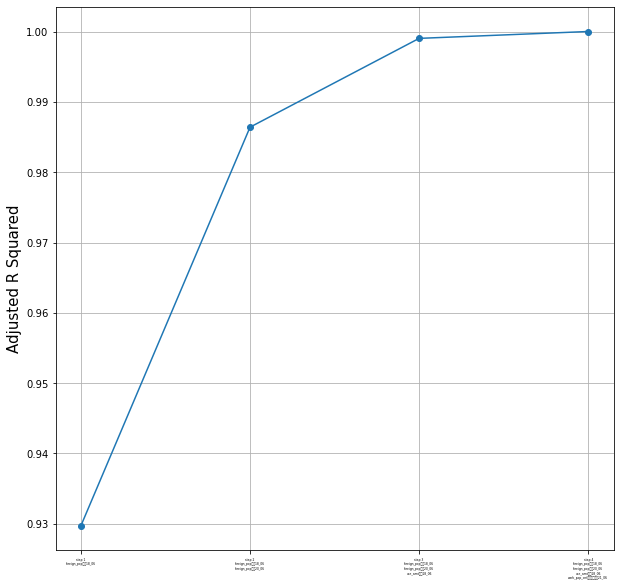

['foreign_pop여성18_06', 'foreign_pop남성20_06', 'use_amt부페18_06', 'work_pop_cnt장기해외제주21_06']


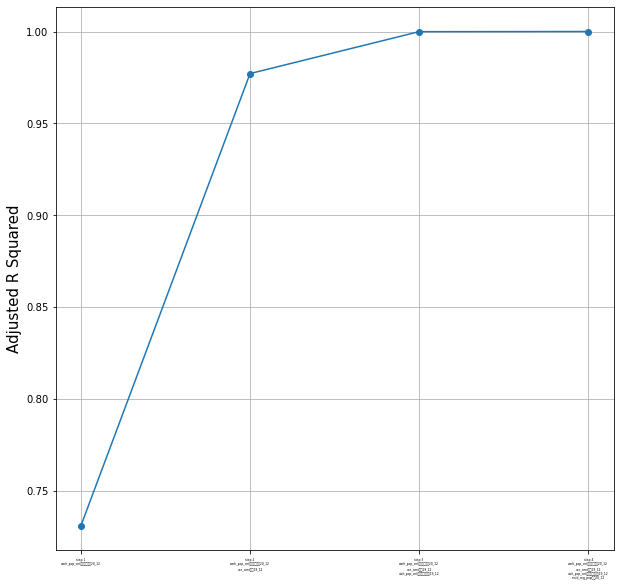

['work_pop_cnt장기해외제주20_12', 'use_amt한식19_12', 'visit_pop_cnt내국인여성제주19_12', 'resid_reg_pop여성20_12']


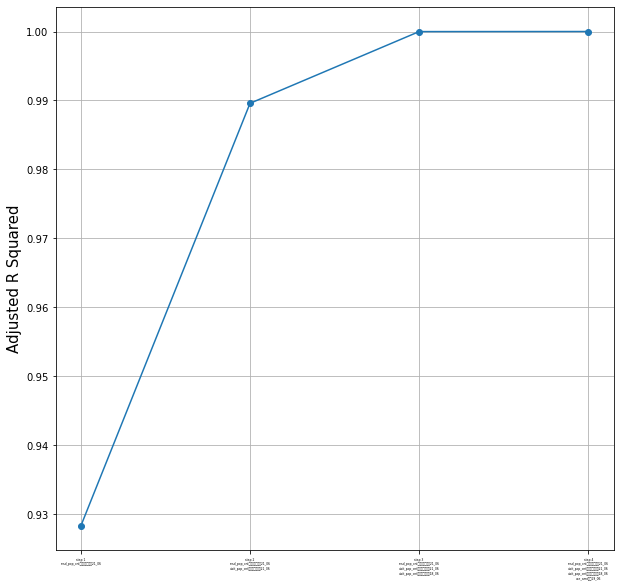

['resd_pop_cnt내국인남성제주21_06', 'visit_pop_cnt내국인남성그외21_06', 'visit_pop_cnt내국인남성그외18_06', 'use_amt배달19_06']


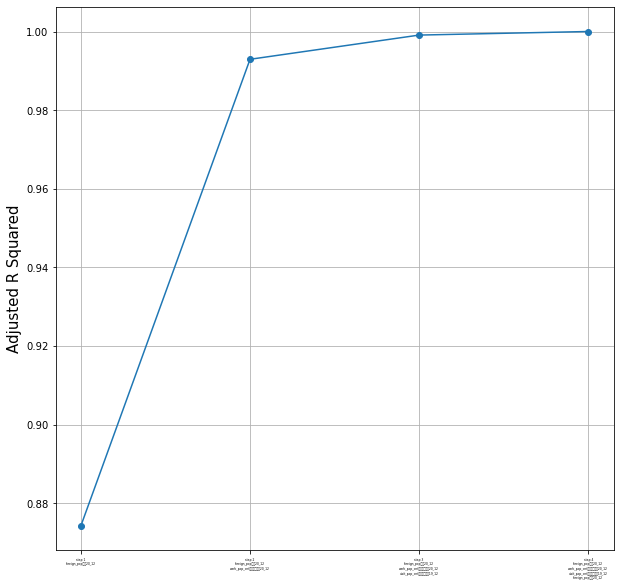

['foreign_pop여성20_12', 'work_pop_cnt장기해외제주20_12', 'visit_pop_cnt장기해외제주19_12', 'foreign_pop남성20_12']


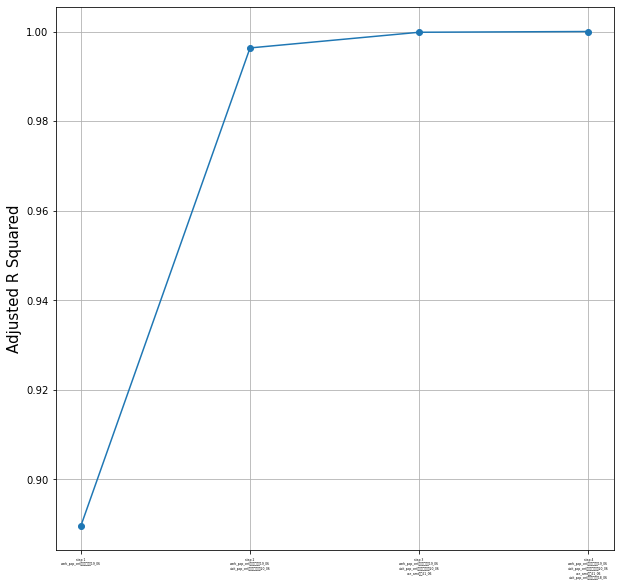

['work_pop_cnt장기해외제주19_06', 'visit_pop_cnt내국인남성그외20_06', 'use_amt부페21_06', 'visit_pop_cnt장기해외제주18_06']


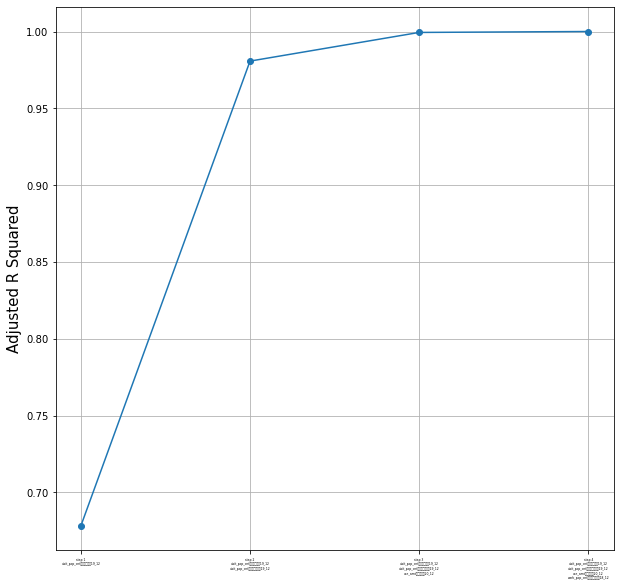

['visit_pop_cnt장기해외그외19_12', 'visit_pop_cnt내국인남성그외19_12', 'use_amt패스트푸드20_12', 'work_pop_cnt내국인여성제주18_12']


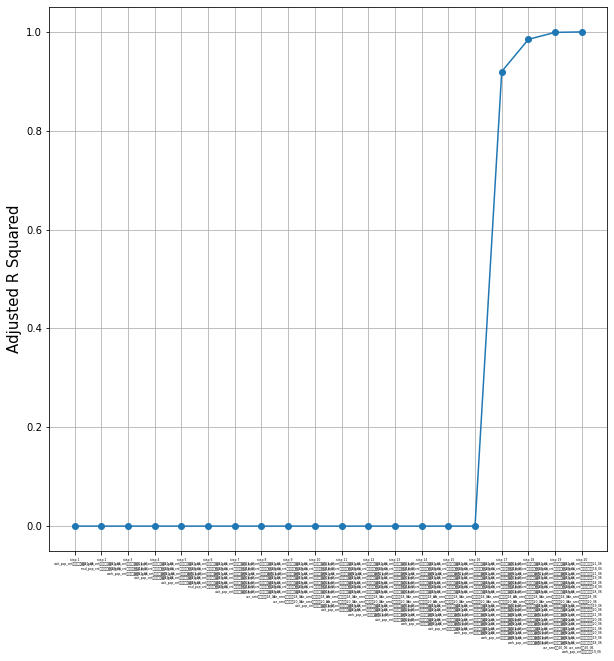

['visit_pop_cnt내국인남성제주21_06', 'resd_pop_cnt내국인여성제주18_06', 'work_pop_cnt내국인여성제주21_06', 'visit_pop_cnt내국인남성제주19_06', 'visit_pop_cnt내국인여성제주18_06', 'resd_pop_cnt내국인남성제주18_06', 'visit_pop_cnt내국인남성제주18_06', 'use_amt농축수산물18_06', 'use_amt농축수산물20_06', 'visit_pop_cnt내국인여성제주19_06', 'visit_pop_cnt내국인남성제주20_06', 'work_pop_cnt내국인남성제주21_06', 'visit_pop_cnt내국인여성제주20_06', 'work_pop_cnt내국인여성제주20_06', 'visit_pop_cnt내국인여성제주21_06', 'work_pop_cnt내국인남성제주20_06', 'work_pop_cnt내국인남성그외19_06', 'work_pop_cnt내국인여성제주18_06', 'use_amt부페20_06', 'work_pop_cnt장기해외그외19_06']


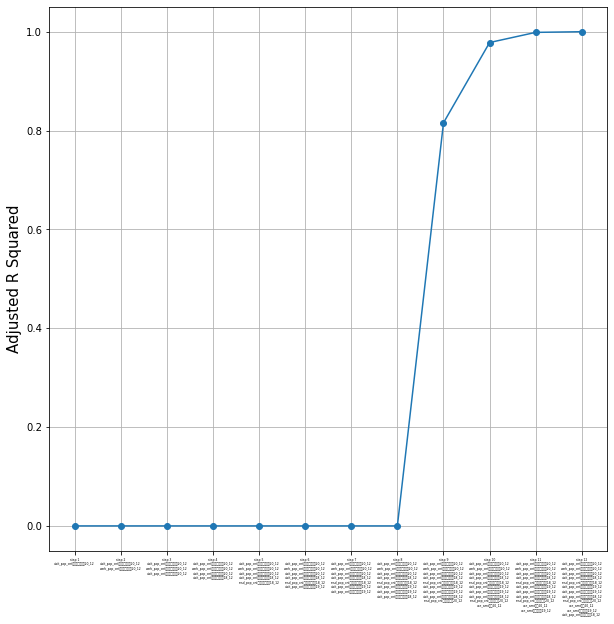

['visit_pop_cnt내국인남성제주20_12', 'work_pop_cnt내국인여성제주20_12', 'visit_pop_cnt내국인여성제주20_12', 'visit_pop_cnt내국인여성제주18_12', 'resd_pop_cnt내국인남성제주18_12', 'visit_pop_cnt내국인남성제주19_12', 'visit_pop_cnt내국인여성제주19_12', 'visit_pop_cnt내국인남성제주18_12', 'resd_pop_cnt장기해외제주20_12', 'use_amt한식20_12', 'use_amt아시아음식19_12', 'visit_pop_cnt장기해외제주18_12']


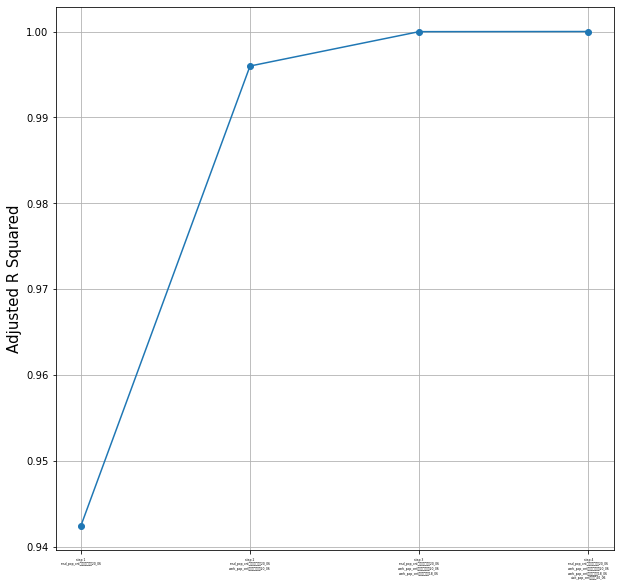

['resd_pop_cnt내국인여성제주20_06', 'work_pop_cnt내국인남성제주20_06', 'work_pop_cnt장기해외제주18_06', 'visit_pop_cnt단기해외20_06']


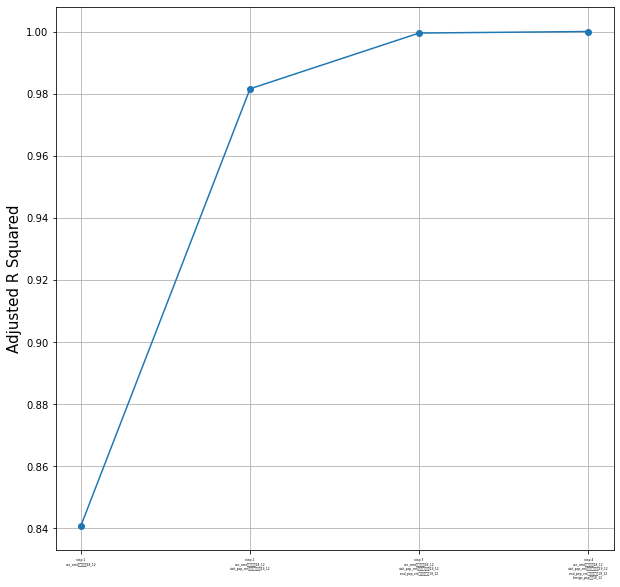

['use_amt패스트푸드18_12', 'visit_pop_cnt내국인남성제주19_12', 'resd_pop_cnt장기해외제주19_12', 'foreign_pop여성18_12']


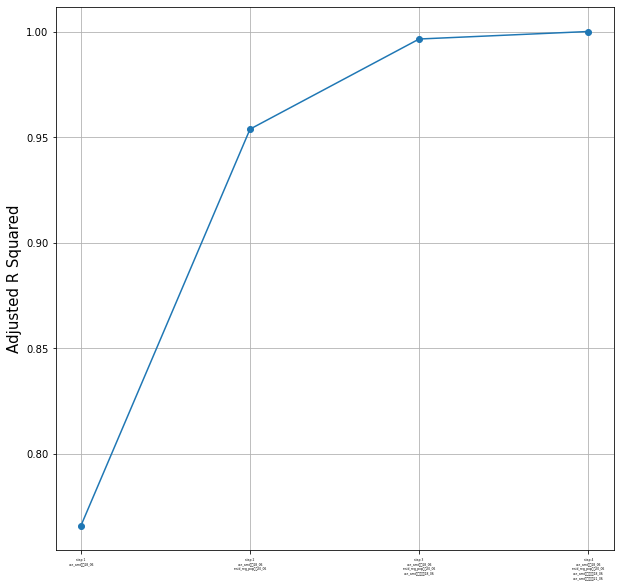

['use_amt배달18_06', 'resid_reg_pop여성20_06', 'use_amt농축수산물18_06', 'use_amt패스트푸드21_06']


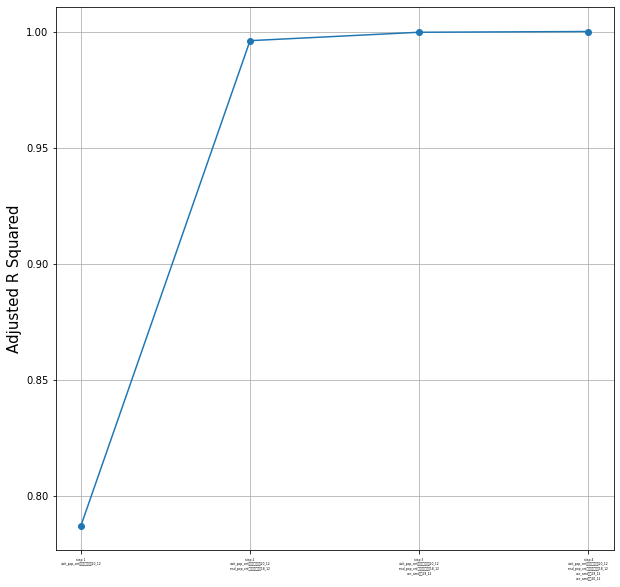

['visit_pop_cnt내국인남성제주20_12', 'resd_pop_cnt내국인남성제주18_12', 'use_amt한식19_12', 'use_amt배달20_12']


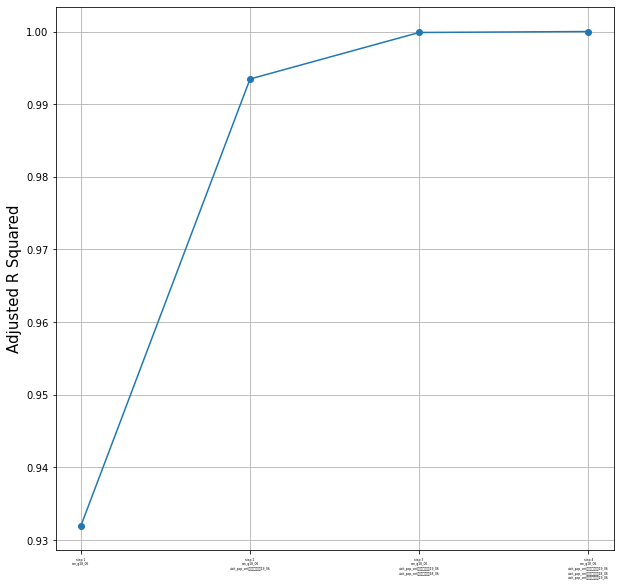

['em_g18_06', 'visit_pop_cnt내국인남성제주19_06', 'visit_pop_cnt내국인여성그외18_06', 'visit_pop_cnt내국인여성제주19_06']


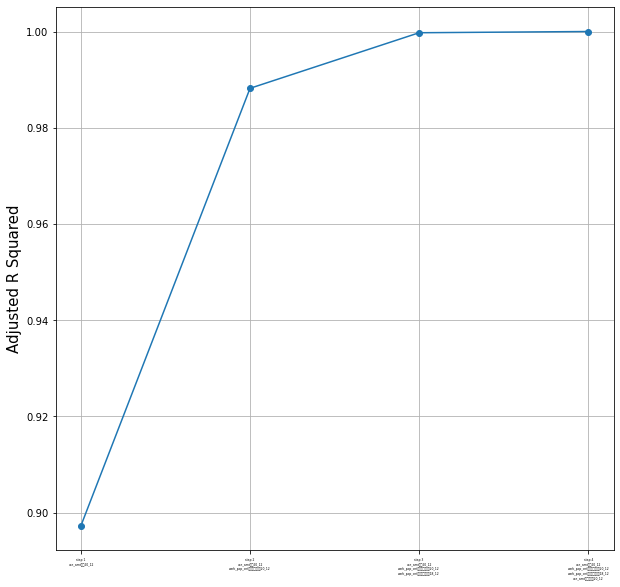

['use_amt부페20_12', 'work_pop_cnt내국인여성그외20_12', 'work_pop_cnt내국인여성그외18_12', 'use_amt아시아음식20_12']


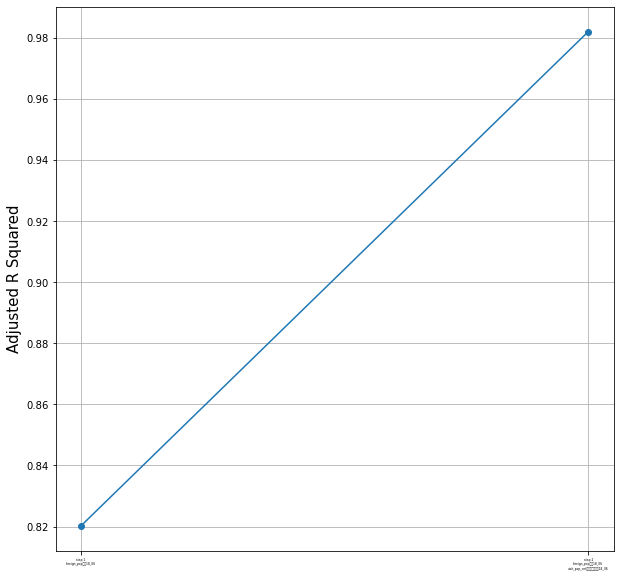

['foreign_pop남성18_06', 'visit_pop_cnt내국인여성그외18_06']


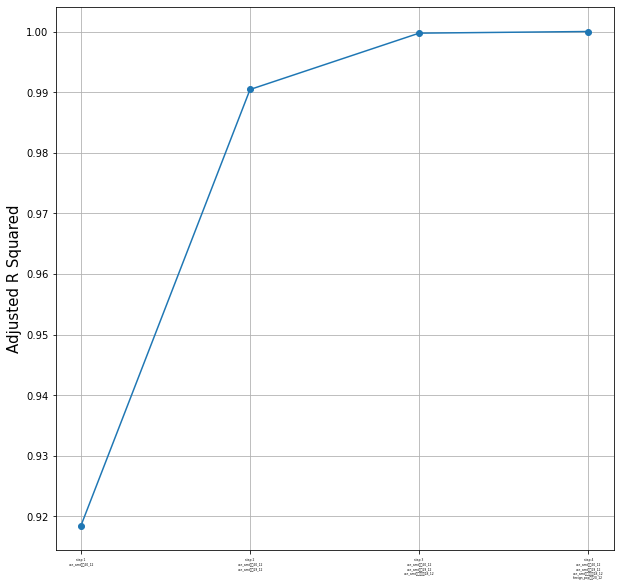

['use_amt부페20_12', 'use_amt배달19_12', 'use_amt아시아음식18_12', 'foreign_pop남성20_12']


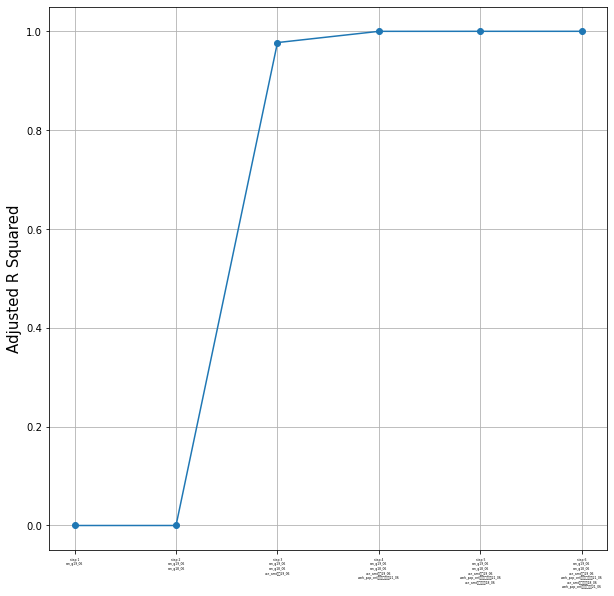

['em_g19_06', 'em_g18_06', 'use_amt식품19_06', 'work_pop_cnt내국인여성그외21_06', 'use_amt패스트푸드18_06', 'work_pop_cnt장기해외제주21_06']


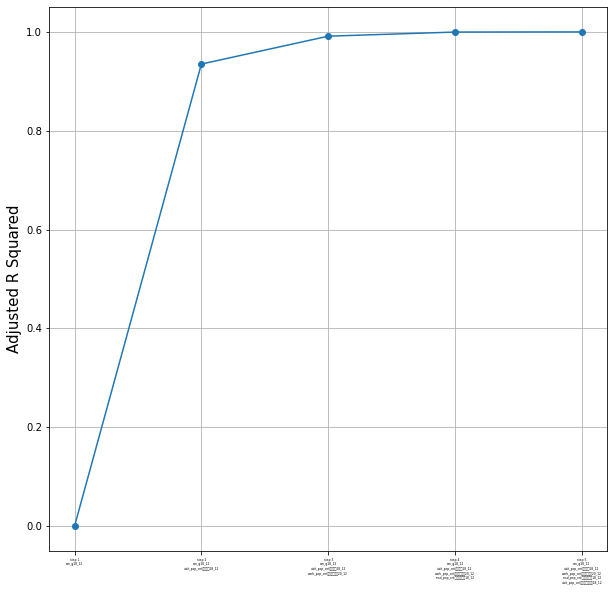

['em_g18_12', 'visit_pop_cnt단기해외18_12', 'work_pop_cnt장기해외제주20_12', 'resd_pop_cnt장기해외제주18_12', 'visit_pop_cnt내국인남성그외18_12']


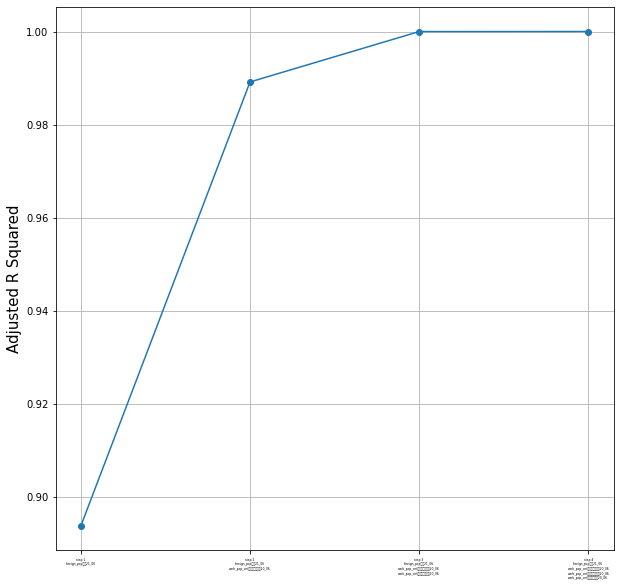

['foreign_pop남성21_06', 'work_pop_cnt내국인남성제주20_06', 'work_pop_cnt내국인여성그외20_06', 'work_pop_cnt장기해외그외20_06']


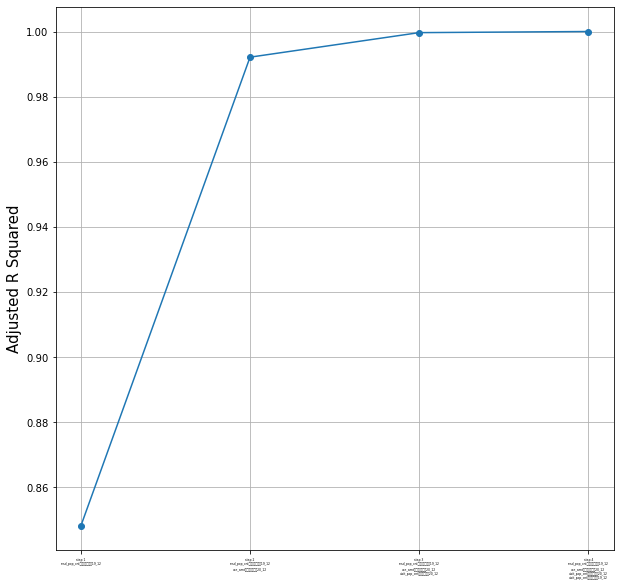

['resd_pop_cnt내국인여성제주19_12', 'use_amt주점및주류판매20_12', 'visit_pop_cnt장기해외제주20_12', 'visit_pop_cnt장기해외그외19_12']


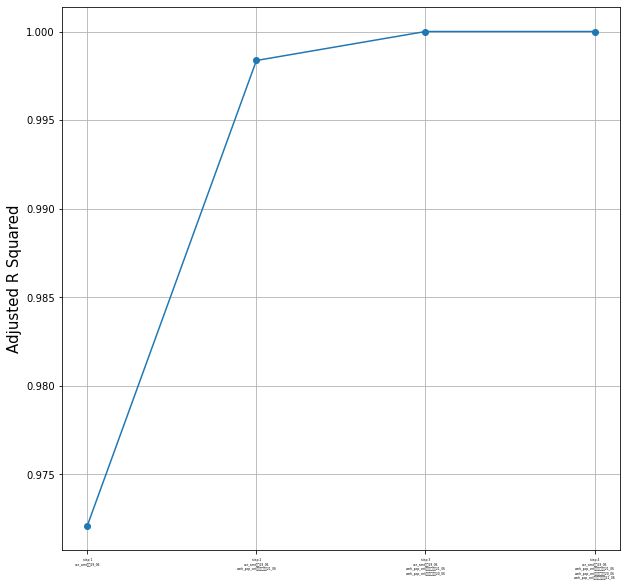

['use_amt식품19_06', 'work_pop_cnt장기해외그외21_06', 'work_pop_cnt장기해외제주20_06', 'work_pop_cnt내국인여성제주21_06']


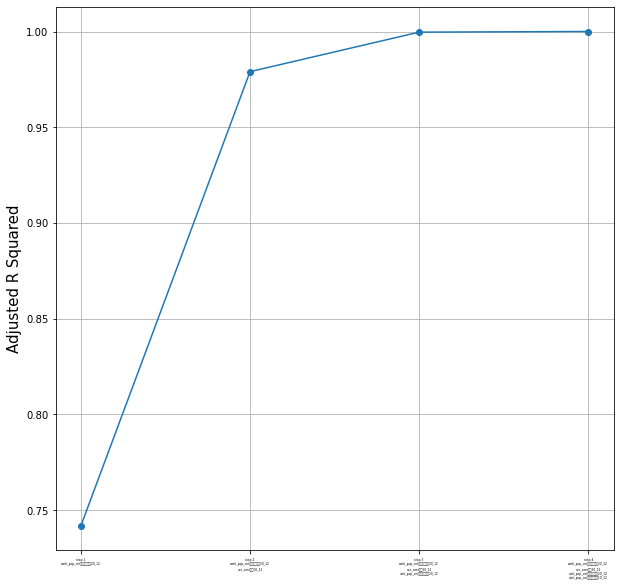

['work_pop_cnt장기해외그외20_12', 'use_amt배달20_12', 'visit_pop_cnt장기해외그외20_12', 'visit_pop_cnt장기해외그외19_12']


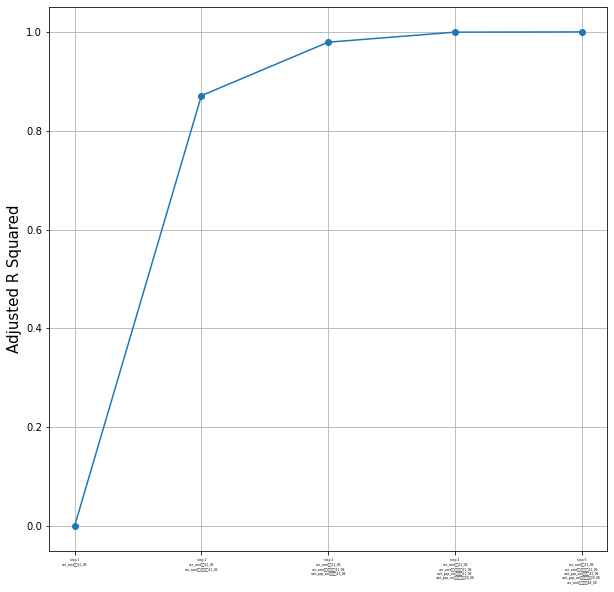

['use_amt부페21_06', 'use_amt마트/슈퍼마켓21_06', 'visit_pop_cnt단기해외21_06', 'visit_pop_cnt장기해외제주20_06', 'use_amt패스트푸드18_06']


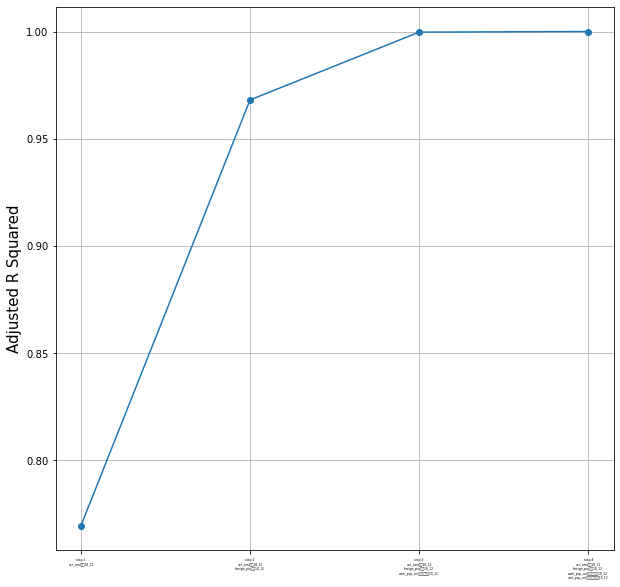

['use_amt한식18_12', 'foreign_pop여성18_12', 'work_pop_cnt장기해외제주20_12', 'visit_pop_cnt내국인여성제주19_12']


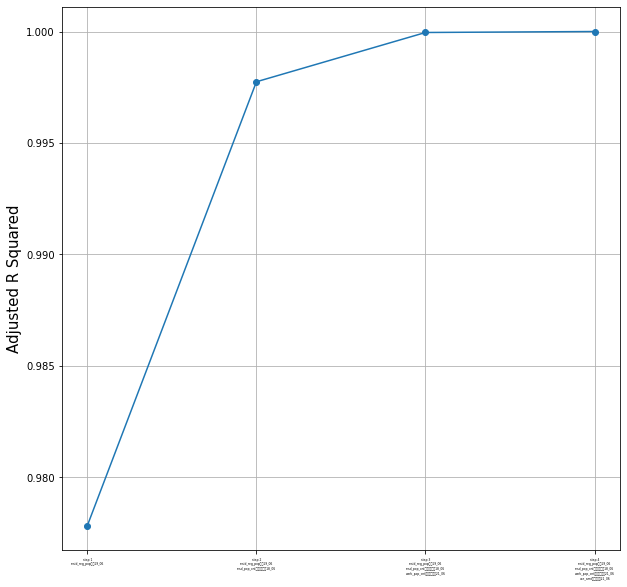

['resid_reg_pop남성19_06', 'resd_pop_cnt장기해외제주18_06', 'work_pop_cnt장기해외그외21_06', 'use_amt패스트푸드21_06']


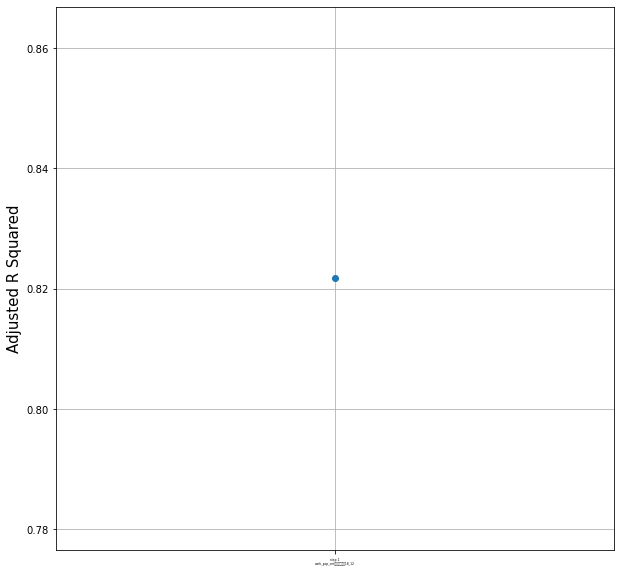

['work_pop_cnt장기해외그외18_12']


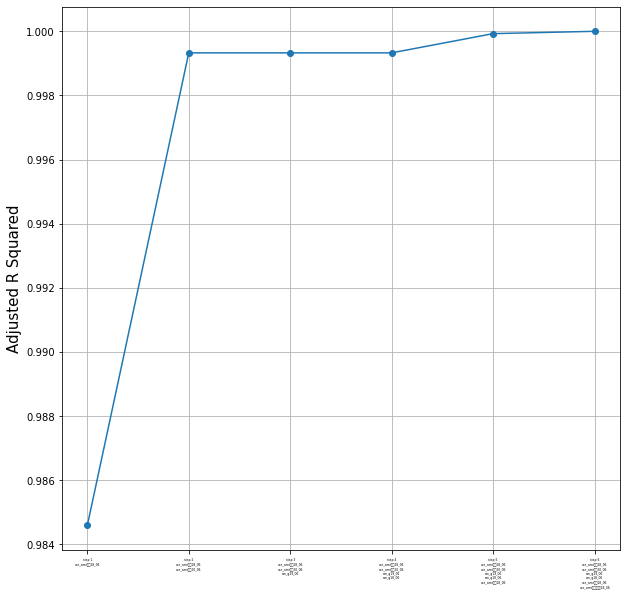

['use_amt한식18_06', 'use_amt양식20_06', 'em_g19_06', 'em_g18_06', 'use_amt배달18_06', 'use_amt아시아음식18_06']


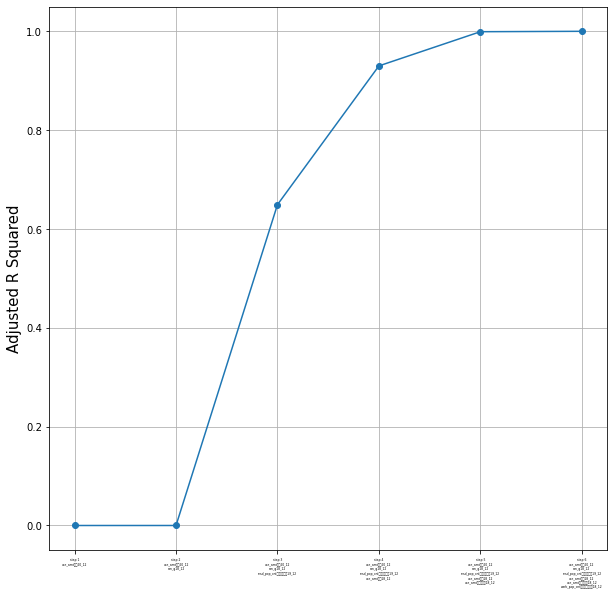

['use_amt부페20_12', 'em_g18_12', 'resd_pop_cnt장기해외제주19_12', 'use_amt부페18_12', 'use_amt아시아음식18_12', 'work_pop_cnt내국인여성제주18_12']


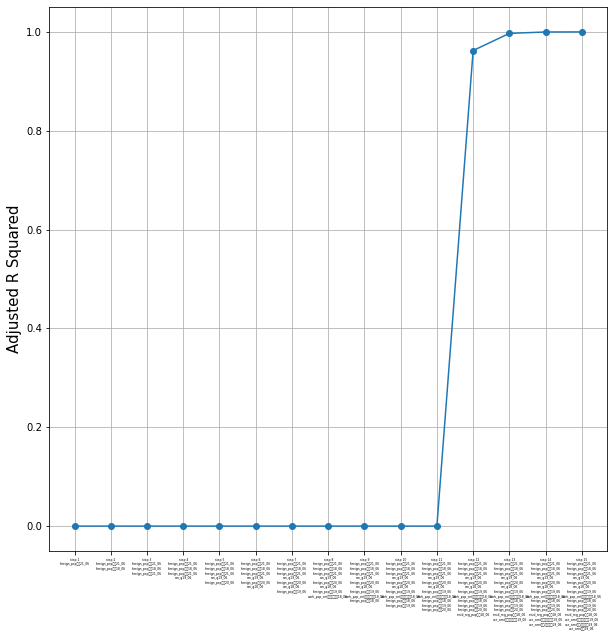

['foreign_pop여성21_06', 'foreign_pop여성18_06', 'foreign_pop남성21_06', 'em_g19_06', 'foreign_pop남성20_06', 'em_g18_06', 'foreign_pop남성19_06', 'work_pop_cnt장기해외그외18_06', 'foreign_pop남성18_06', 'foreign_pop여성19_06', 'foreign_pop여성20_06', 'resid_reg_pop여성18_06', 'use_amt주점및주류판매19_06', 'use_amt마트/슈퍼마켓19_06', 'use_amt간식19_06']


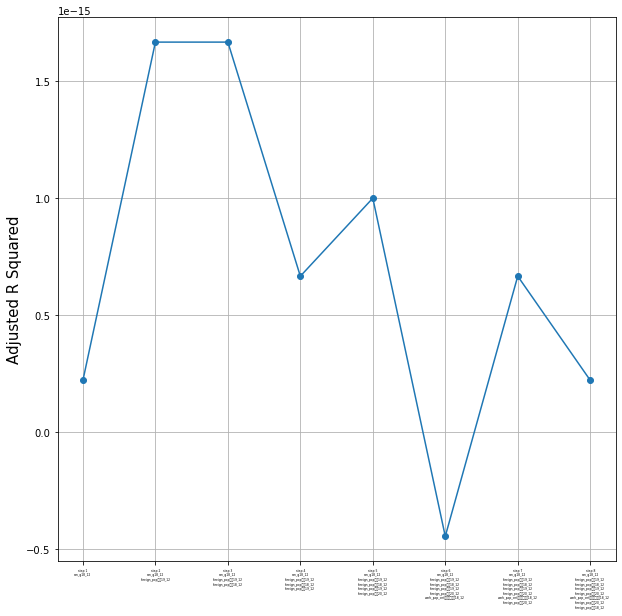

['em_g18_12', 'foreign_pop남성19_12', 'foreign_pop남성18_12', 'foreign_pop여성19_12', 'foreign_pop남성20_12', 'work_pop_cnt장기해외그외18_12', 'foreign_pop여성20_12', 'foreign_pop여성18_12']


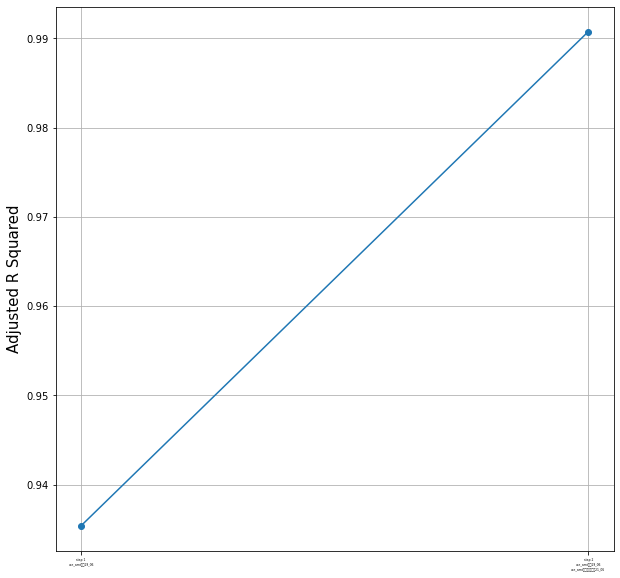

['use_amt식품19_06', 'use_amt주점및주류판매21_06']


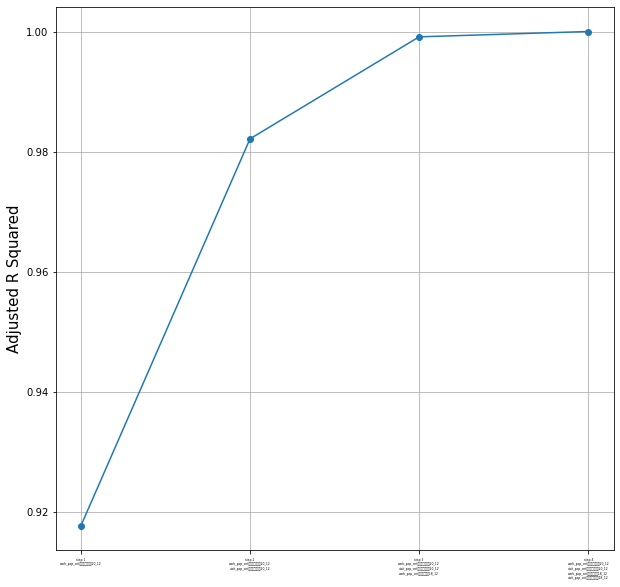

['work_pop_cnt내국인남성제주20_12', 'visit_pop_cnt내국인남성제주20_12', 'work_pop_cnt장기해외그외18_12', 'visit_pop_cnt내국인남성제주18_12']


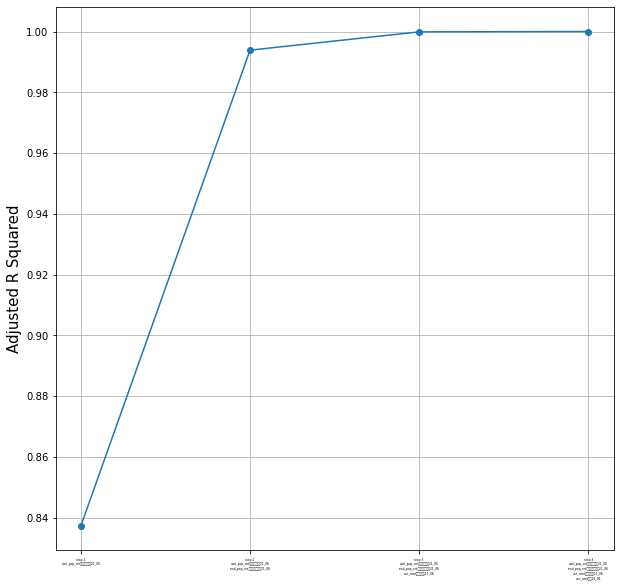

['visit_pop_cnt장기해외그외21_06', 'resd_pop_cnt내국인남성제주21_06', 'use_amt농축수산물21_06', 'use_amt양식19_06']


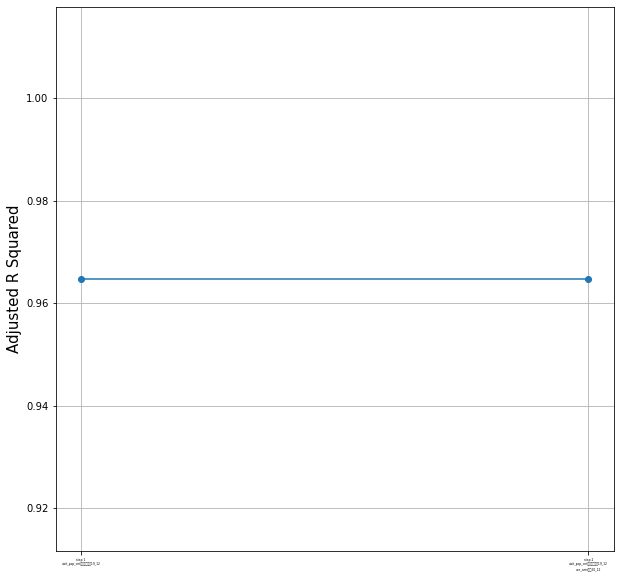

['visit_pop_cnt장기해외그외19_12', 'use_amt부페20_12']


{'건입동1~6': ['foreign_pop여성20_06',
  'use_amt농축수산물18_06',
  'visit_pop_cnt내국인남성그외18_06',
  'total_pop여성19_06'],
 '건입동7~12': ['resd_pop_cnt내국인남성제주18_12',
  'use_amt양식19_12',
  'use_amt주점및주류판매18_12',
  'resd_pop_cnt장기해외제주20_12'],
 '구좌읍1~6': ['em_g19_06',
  'em_g18_06',
  'resd_pop_cnt내국인남성제주21_06',
  'use_amt마트/슈퍼마켓18_06',
  'resd_pop_cnt내국인남성제주20_06',
  'use_amt한식18_06'],
 '구좌읍7~12': ['em_g18_12',
  'resid_reg_pop남성20_12',
  'work_pop_cnt내국인여성제주19_12',
  'visit_pop_cnt내국인남성그외19_12',
  'work_pop_cnt내국인여성그외19_12'],
 '남원읍1~6': ['work_pop_cnt내국인여성제주21_06',
  'use_amt식품21_06',
  'work_pop_cnt내국인여성제주18_06',
  'resd_pop_cnt내국인여성제주18_06'],
 '남원읍7~12': ['visit_pop_cnt내국인남성제주18_12',
  'work_pop_cnt내국인남성제주19_12',
  'total_pop남성19_12',
  'em_g18_12'],
 '노형동1~6': ['use_amt간식19_06',
  'resid_reg_pop남성21_06',
  'resd_pop_cnt내국인남성제주20_06',
  'use_amt마트/슈퍼마켓21_06',
  'resid_reg_pop남성19_06',
  'resd_pop_cnt내국인남성제주21_06',
  'use_amt패스트푸드19_06',
  'em_g19_06',
  'use_amt마트/슈퍼마켓20_06',
  'use_amt마트/슈퍼마켓18_06

In [12]:
#동별로 예측        

dic_month = {}

for k in range(0,42):   #42개지역 순환
    dic = {}
    #연, 월단위로 정렬
    #1~6월
    for j in ['01','02','03','04','05','06']:
        month=[]
        for i in merge_scale.columns.tolist():
            if i[-5:] == '18_'+j:   #칼럼 날짜가 18_월 일때
                month.append(i)
        for i in merge_scale.columns.tolist():
            if i[-5:] == '19_'+j:
                month.append(i)
        for i in merge_scale.columns.tolist():
            if i[-5:] == '20_'+j:
                month.append(i)  
        for i in merge_scale.columns.tolist():
            if i[-5:] == '21_'+j:
                month.append(i)
        dic[j+'월val']=merge_scale[month].iloc[k].values    #연-월단위로 정렬된 df의 벨류를 사전으로 만듦
    merge_part= pd.DataFrame.from_dict(dic, orient='index', columns=merge_scale[month].iloc[k].index)

    #선택법
    print(stepwise_select('em_g21_'+j, merge_part))
    dic_month[merge_scale.index[k]+'1~6'] = selected_variables


    dic= {}
    #7~12월
    for j in ['07','08','09','10','11','12']: 
        month=[]
        for i in merge_scale.columns.tolist():
            if i[-5:] == '18_'+j:
                month.append(i)
        for i in merge_scale.columns.tolist():
            if i[-5:] == '19_'+j:
                month.append(i)
        for i in merge_scale.columns.tolist():
            if i[-5:] == '20_'+j:
                month.append(i)  
        dic[j+'월val']=merge_scale[month].iloc[k].values   

    merge_part= pd.DataFrame.from_dict(dic, orient='index', columns=merge_scale[month].iloc[k].index)
    
    #단계적선택법
    print(stepwise_select('em_g20_'+j, merge_part))
    dic_month[merge_scale.index[k]+'7~12'] = selected_variables

pd.DataFrame.from_dict(dic_month, orient='index').to_csv('동별 선택법.csv', encoding='cp949')
dic_month